## 1. Carga de librerias, modelos y herramientas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utilsforecast.preprocessing import fill_gaps
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

In [2]:
def pretreat_data_df(df, col_name):
    new_df = df[df['interaction'] == col_name].copy()
    new_df.rename(columns={'data.value': col_name}, inplace=True)
    new_df.drop(columns='interaction', inplace=True)
    new_df.set_index('timestamp', inplace=True)
    new_df[col_name] = new_df[col_name].astype(float)
    return new_df

def pretreat_true_false_data_df(df, col_name):
    new_df = df[df['interaction'] == col_name].copy()
    new_df.rename(columns={'data.value': col_name}, inplace=True)
    new_df.drop(columns='interaction', inplace=True)
    new_df.set_index('timestamp', inplace=True)
    new_df[col_name] = new_df[col_name].apply(lambda x: 1 if x == 'true' else 0)
    return new_df

In [3]:
# Load the data
data = pd.read_csv('../data/wot-data-db.interactions-datas_sewy207.csv')
data['timestamp'] = pd.to_datetime(data['timestamp']).dt.round("min").dt.tz_localize(None)
df_test = data[['timestamp', 'data.value', 'interaction']]

df_temperature = pretreat_data_df(df_test, 'temperature')
df_brightness = pretreat_data_df(df_test, 'brightness')
df_humidity = pretreat_data_df(df_test, 'humidity')
df_airpressure = pretreat_data_df(df_test, 'airpressure')
df_co2 = pretreat_data_df(df_test, 'CO2')

len(df_temperature), len(df_brightness), len(df_humidity), len(df_airpressure), len(df_co2)

(33862, 31450, 82381, 69978, 157590)

In [4]:
df_temperature.head()

,temperature
timestamp,
2023-03-03 09:30:00,22.7
2023-03-03 09:31:00,22.5
2023-03-03 09:32:00,22.6
2023-03-03 09:34:00,22.7
2023-03-03 09:36:00,22.6


In [5]:
df_airpressure.head()

,airpressure
timestamp,
2023-03-03 09:30:00,104270.0
2023-03-03 09:31:00,104260.0
2023-03-03 09:32:00,104270.0
2023-03-03 09:33:00,104260.0
2023-03-03 09:34:00,104270.0


In [6]:
df_brightness.head()

,brightness
timestamp,
2023-03-03 09:29:00,146.0
2023-03-03 09:30:00,146.0
2023-03-03 09:36:00,140.0
2023-03-03 09:38:00,134.0
2023-03-03 09:40:00,140.0


In [7]:
df_co2.head()

,CO2
timestamp,
2023-03-03 09:30:00,503.04
2023-03-03 09:31:00,626.88
2023-03-03 09:32:00,511.04
2023-03-03 09:34:00,518.08
2023-03-03 09:35:00,519.04


In [8]:
df_humidity.head()

,humidity
timestamp,
2023-03-03 09:30:00,27.0
2023-03-03 09:31:00,26.8
2023-03-03 09:32:00,27.0
2023-03-03 09:33:00,26.9
2023-03-03 09:34:00,27.0


In [9]:
def plot_data(df, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(df)
    plt.title('Touch 207 ' + col_name)
    plt.ylabel(col_name)
    plt.show()

def plot_hist(df, col_name):
    plt.figure(figsize=(10,6))
    plt.hist(df)
    plt.title('Touch 207 ' + col_name)
    plt.ylabel('Frequency')
    plt.show()

def plot_day_data(df, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(df[col_name].loc['2023-03-05':'2023-03-06'])
    plt.title('1 day Touch 207 ' + col_name)
    plt.ylabel(col_name)
    plt.show()

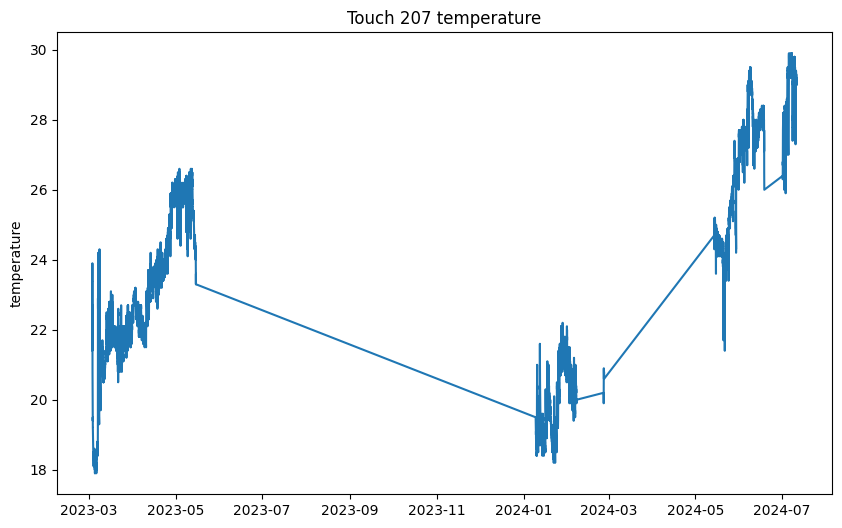

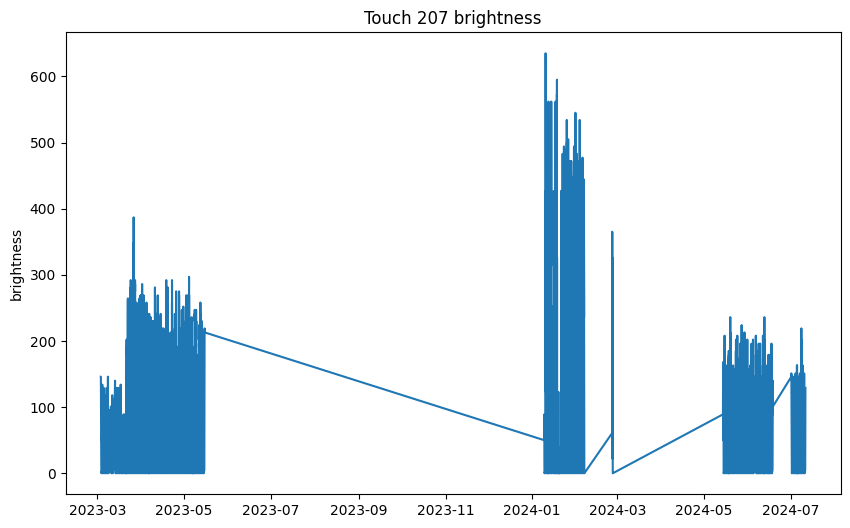

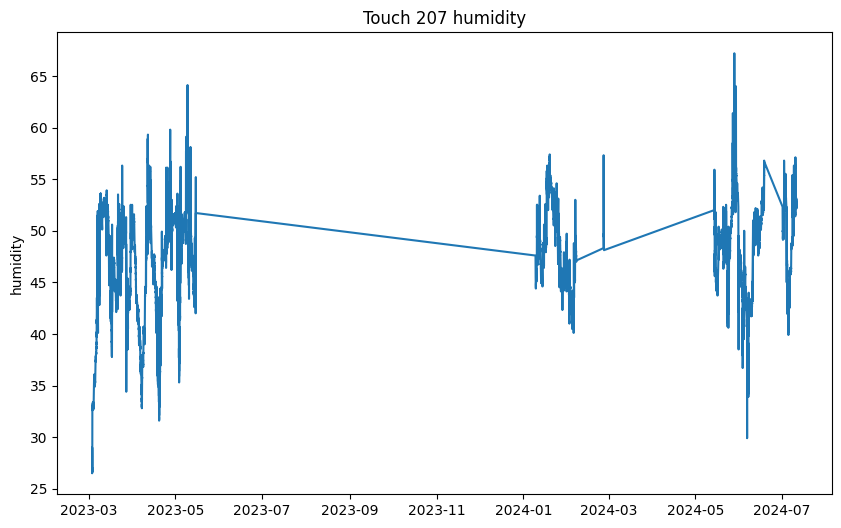

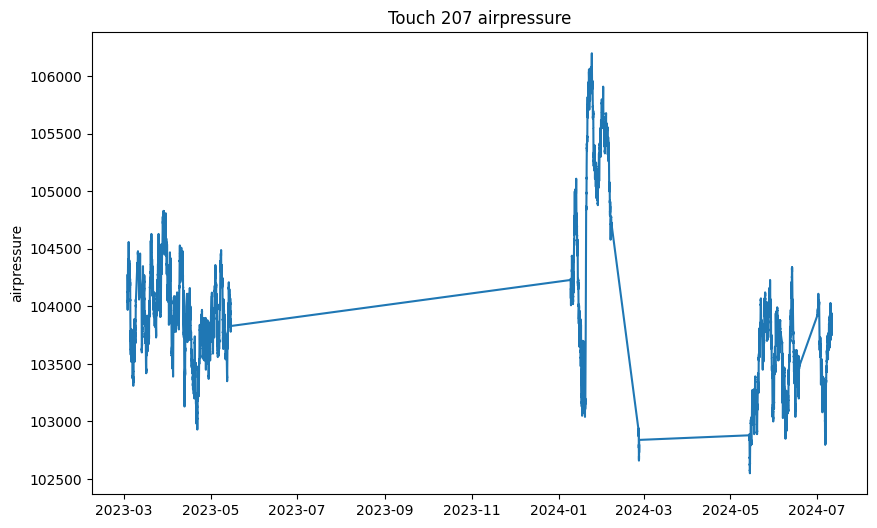

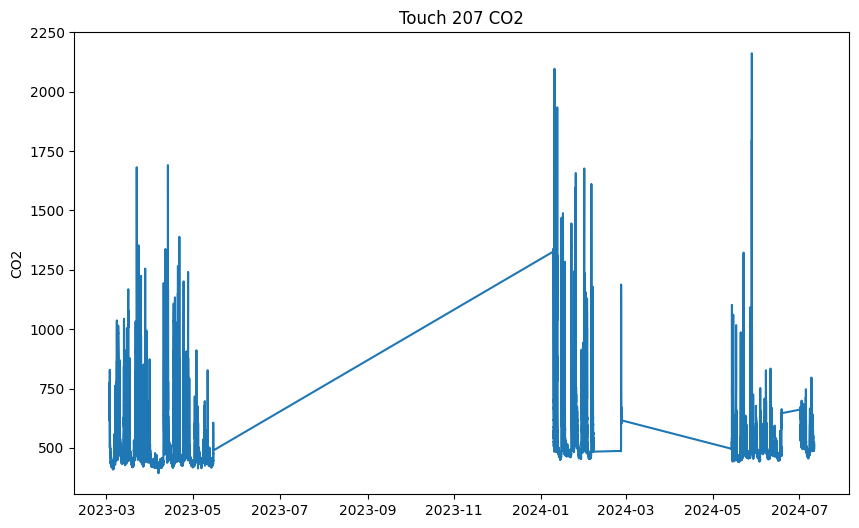

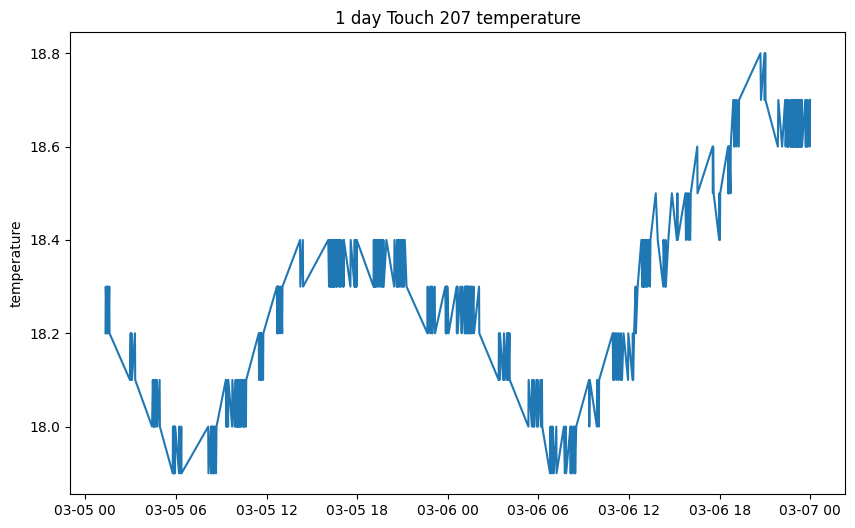

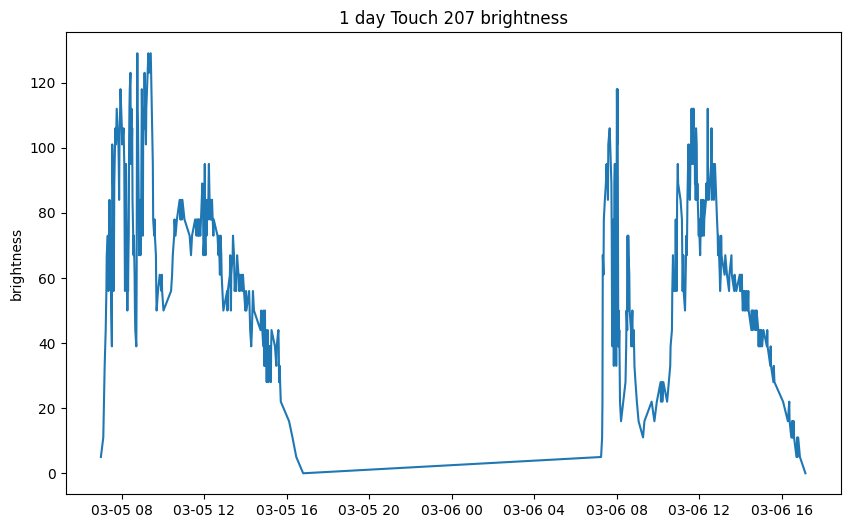

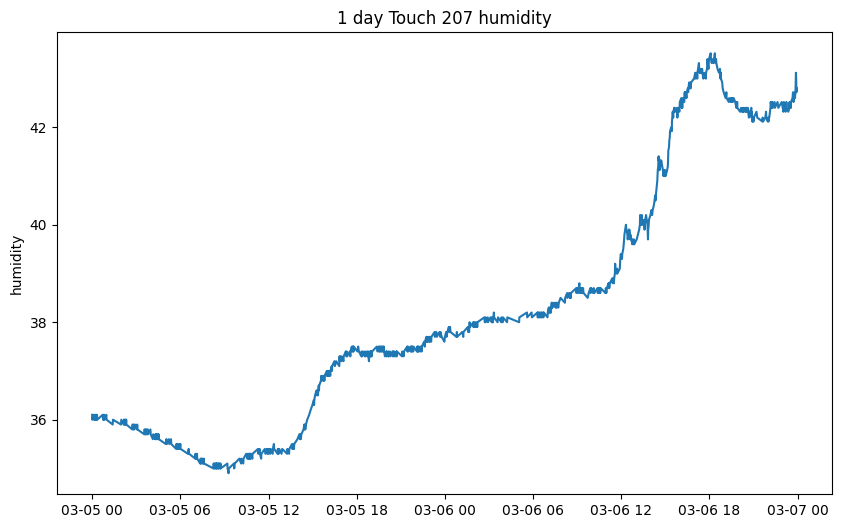

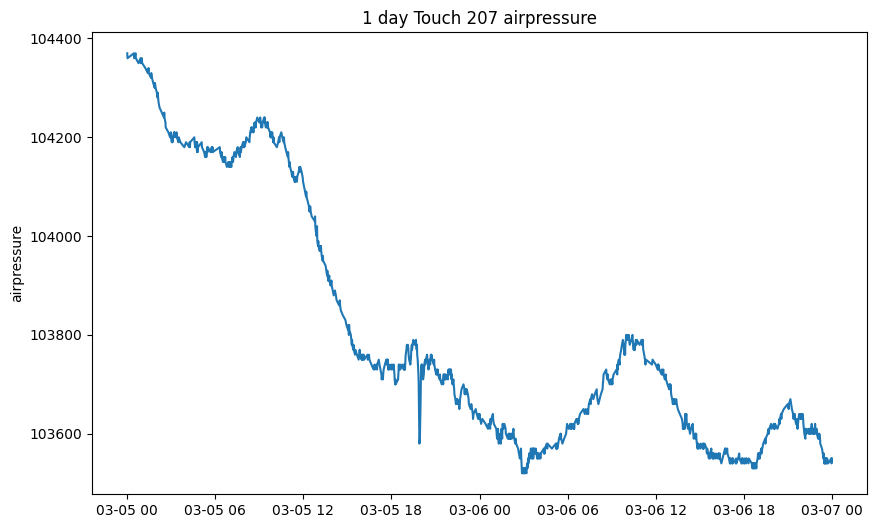

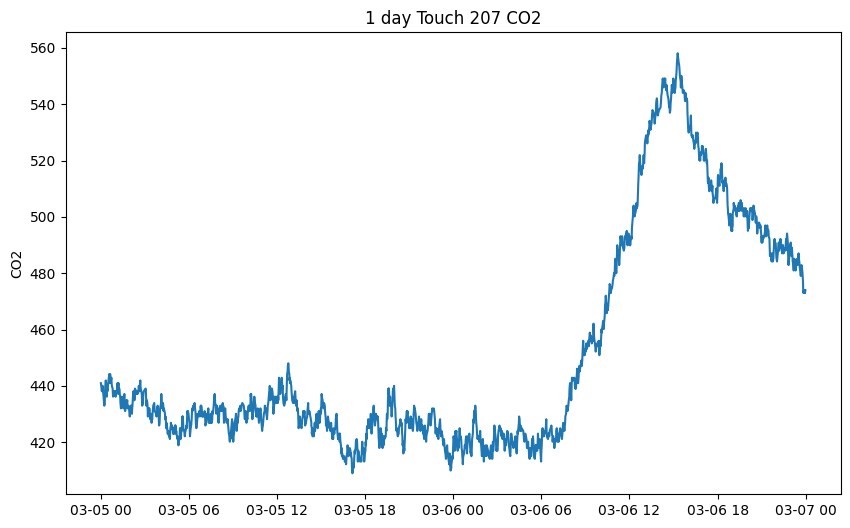

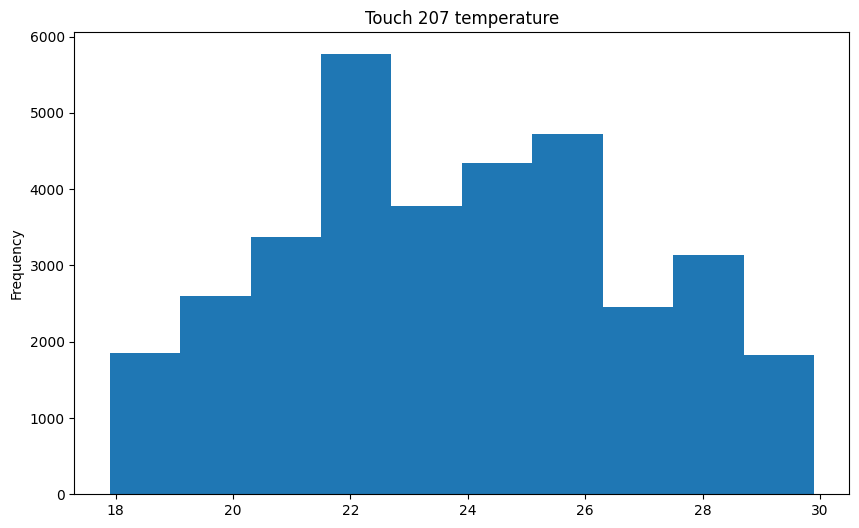

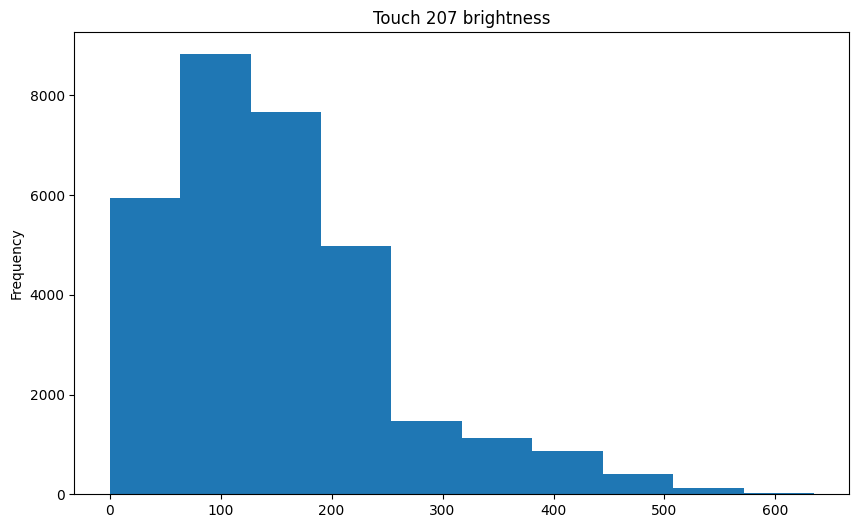

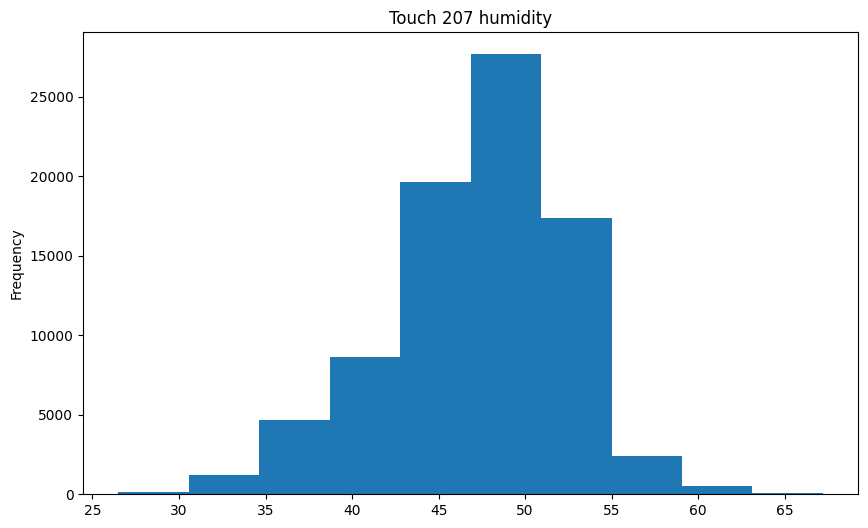

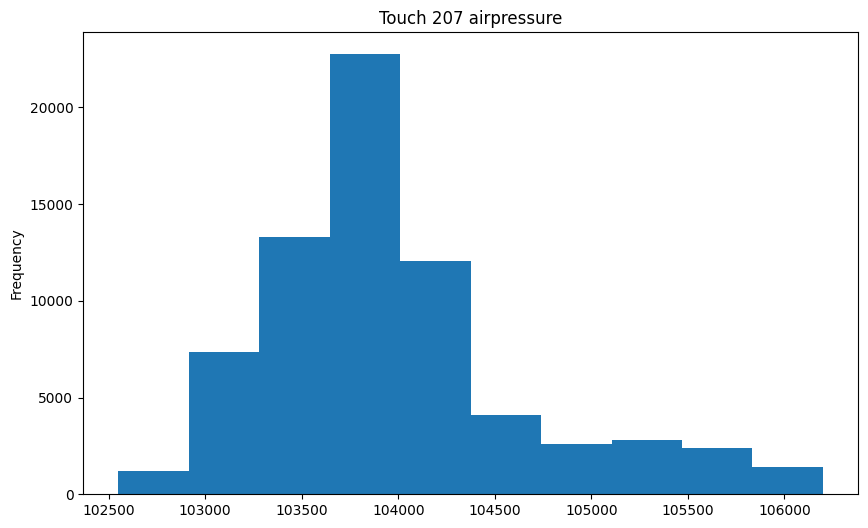

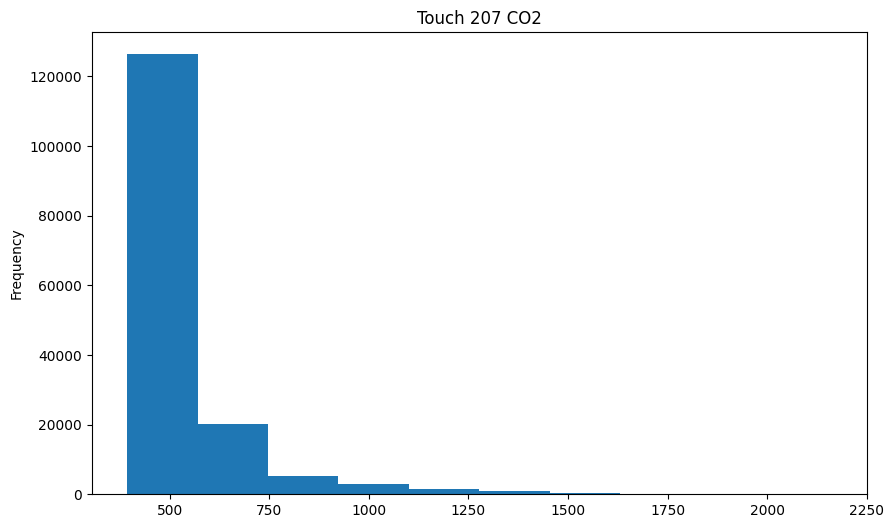

In [10]:
plot_data(df_temperature, 'temperature')
plot_data(df_brightness, 'brightness')
plot_data(df_humidity, 'humidity')
plot_data(df_airpressure, 'airpressure')
plot_data(df_co2, 'CO2')
plot_day_data(df_temperature, 'temperature')
plot_day_data(df_brightness, 'brightness')
plot_day_data(df_humidity, 'humidity')
plot_day_data(df_airpressure, 'airpressure')
plot_day_data(df_co2, 'CO2')
plot_hist(df_temperature, 'temperature')
plot_hist(df_brightness, 'brightness')
plot_hist(df_humidity, 'humidity')
plot_hist(df_airpressure, 'airpressure')
plot_hist(df_co2, 'CO2')

Debido a todos estos problemas, se ha optado por tomar únicamente el tramo entre marzo y mayo de 2023.

In [11]:
def reduce_df(df, start_date, end_date):
    return df[(df.index >= start_date) & (df.index <= end_date)]

In [12]:
reduced_df_temperature = reduce_df(df_temperature, '2023-03-01', '2023-05-15')
reduced_df_brightness = reduce_df(df_brightness, '2023-03-01', '2023-05-15')
reduced_df_humidity = reduce_df(df_humidity, '2023-03-01', '2023-05-15')
reduced_df_airpressure = reduce_df(df_airpressure, '2023-03-01', '2023-05-15')
reduced_df_co2 = reduce_df(df_co2, '2023-03-01', '2023-05-15')

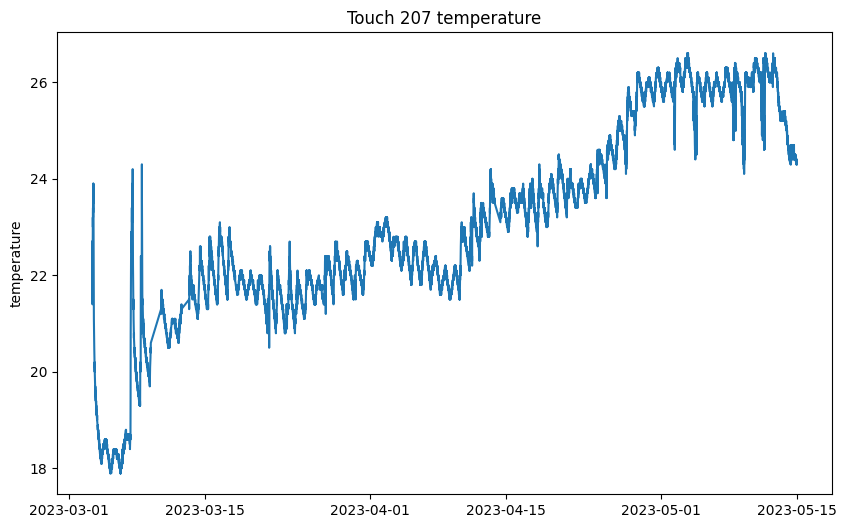

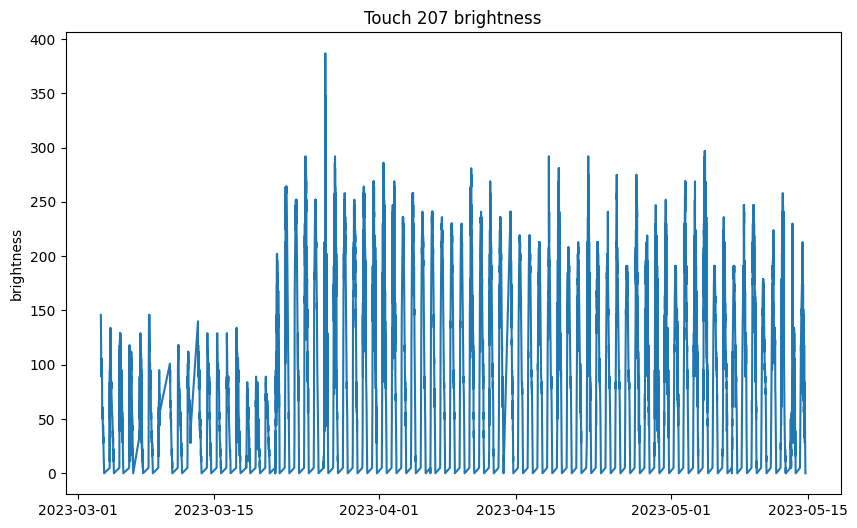

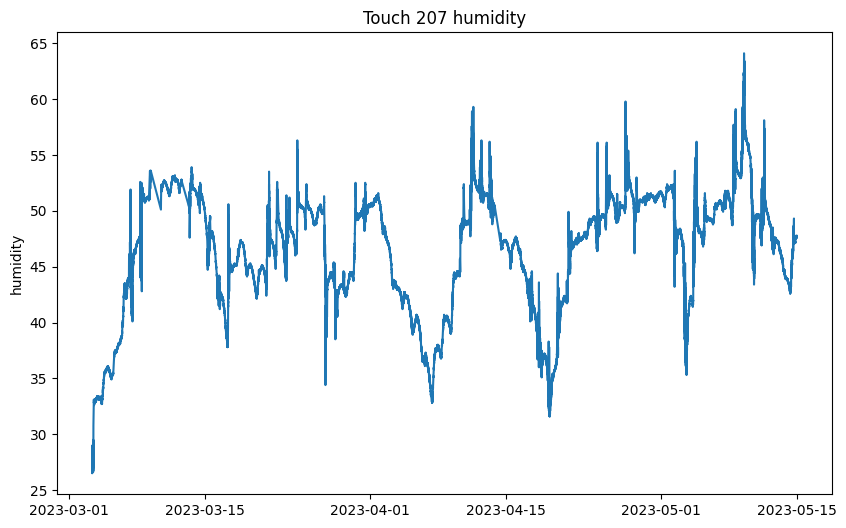

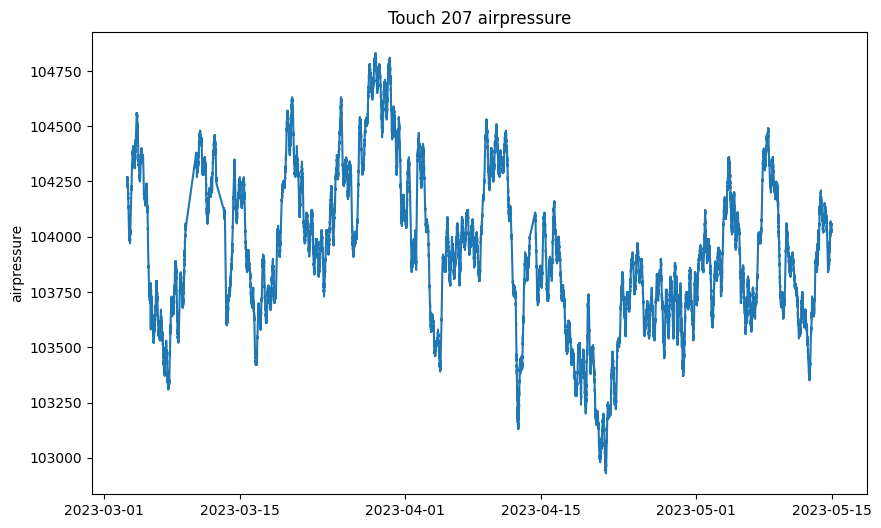

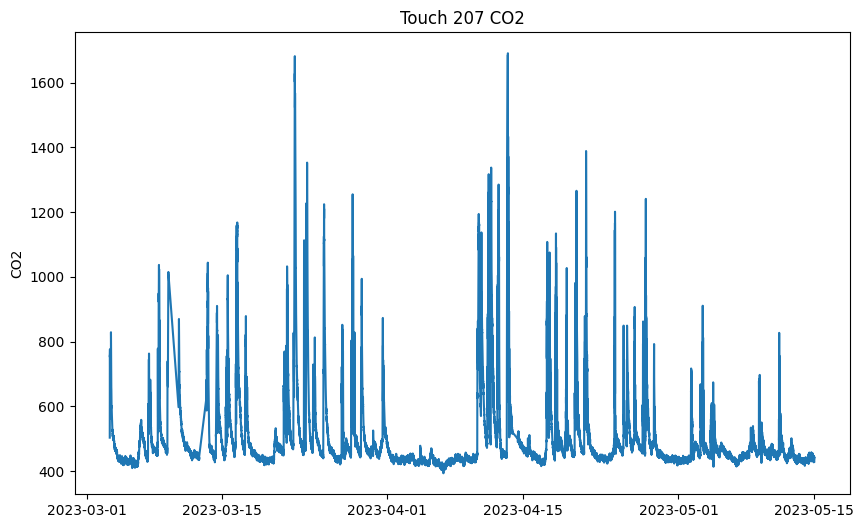

In [13]:
plot_data(reduced_df_temperature, 'temperature')
plot_data(reduced_df_brightness, 'brightness')
plot_data(reduced_df_humidity, 'humidity')
plot_data(reduced_df_airpressure, 'airpressure')
plot_data(reduced_df_co2, 'CO2')

Registros duplicados

In [14]:
def delete_duplicates(df, col_name):
    print(col_name + ' - Número de registros duplicados:', df.index.duplicated().sum())
    if df.index.duplicated().sum() > 0:
        df = df.groupby(df.index).mean()
        print(col_name + ' - Número de registros tras eliminar duplicados:' + str(len(df)))
    else:
        print('No hay registros duplicados')
    return df
    

In [15]:
reduced_df_temperature = delete_duplicates(reduced_df_temperature, 'temperature')
reduced_df_brightness = delete_duplicates(reduced_df_brightness, 'brightness')
reduced_df_humidity = delete_duplicates(reduced_df_humidity, 'humidity')
reduced_df_airpressure = delete_duplicates(reduced_df_airpressure, 'airpressure')
reduced_df_co2 = delete_duplicates(reduced_df_co2, 'CO2')

temperature - Número de registros duplicados: 73
temperature - Número de registros tras eliminar duplicados:17321
brightness - Número de registros duplicados: 87
brightness - Número de registros tras eliminar duplicados:15678
humidity - Número de registros duplicados: 222
humidity - Número de registros tras eliminar duplicados:42158
airpressure - Número de registros duplicados: 156
airpressure - Número de registros tras eliminar duplicados:33990
CO2 - Número de registros duplicados: 542
CO2 - Número de registros tras eliminar duplicados:76390


In [16]:
def fill_gaps_df(df,col_name, boolean=False):
    print(col_name + " - Original data: ", len(df), "rows")
    
    # Rellenamos los valores faltantes
    df = df.resample('min').asfreq()
    if boolean:
        df[col_name] = df[col_name].interpolate(method='ffill')
    else:
        df[col_name] = df[col_name].interpolate(method='linear', limit_direction='both')
    
    print(col_name + " - Updated data: ", len(df), "rows")
    
    return df

In [17]:
reduced_df_temperature = fill_gaps_df(reduced_df_temperature, 'temperature')
reduced_df_brightness = fill_gaps_df(reduced_df_brightness, 'brightness')
reduced_df_humidity = fill_gaps_df(reduced_df_humidity, 'humidity')
reduced_df_airpressure = fill_gaps_df(reduced_df_airpressure, 'airpressure')
reduced_df_co2 = fill_gaps_df(reduced_df_co2, 'CO2')

temperature - Original data:  17321 rows
temperature - Updated data:  104546 rows
brightness - Original data:  15678 rows
brightness - Updated data:  104240 rows
humidity - Original data:  42158 rows
humidity - Updated data:  104540 rows
airpressure - Original data:  33990 rows
airpressure - Updated data:  104548 rows
CO2 - Original data:  76390 rows
CO2 - Updated data:  104551 rows


In [18]:
reduced_df_temperature

,temperature
timestamp,
2023-03-03 09:30:00,22.70
2023-03-03 09:31:00,22.50
2023-03-03 09:32:00,22.60
2023-03-03 09:33:00,22.65
2023-03-03 09:34:00,22.70
...,...
2023-05-14 23:51:00,24.35
2023-05-14 23:52:00,24.40
2023-05-14 23:53:00,24.30


In [19]:
reduced_df_airpressure

,airpressure
timestamp,
2023-03-03 09:30:00,104270.0
2023-03-03 09:31:00,104260.0
2023-03-03 09:32:00,104270.0
2023-03-03 09:33:00,104260.0
2023-03-03 09:34:00,104270.0
...,...
2023-05-14 23:53:00,104020.0
2023-05-14 23:54:00,104022.5
2023-05-14 23:55:00,104025.0


In [20]:
reduced_df_brightness

,brightness
timestamp,
2023-03-03 09:29:00,146.000000
2023-03-03 09:30:00,146.000000
2023-03-03 09:31:00,145.000000
2023-03-03 09:32:00,144.000000
2023-03-03 09:33:00,143.000000
...,...
2023-05-14 18:44:00,2.857143
2023-05-14 18:45:00,2.142857
2023-05-14 18:46:00,1.428571


In [21]:
reduced_df_co2

,CO2
timestamp,
2023-03-03 09:30:00,503.04
2023-03-03 09:31:00,626.88
2023-03-03 09:32:00,511.04
2023-03-03 09:33:00,514.56
2023-03-03 09:34:00,518.08
...,...
2023-05-14 23:56:00,433.76
2023-05-14 23:57:00,432.96
2023-05-14 23:58:00,432.00


In [22]:
reduced_df_airpressure

,airpressure
timestamp,
2023-03-03 09:30:00,104270.0
2023-03-03 09:31:00,104260.0
2023-03-03 09:32:00,104270.0
2023-03-03 09:33:00,104260.0
2023-03-03 09:34:00,104270.0
...,...
2023-05-14 23:53:00,104020.0
2023-05-14 23:54:00,104022.5
2023-05-14 23:55:00,104025.0


Definimos datos de inicio y fin ignorando primer y último dia

In [23]:
reduced_df_temperature = reduced_df_temperature[(reduced_df_temperature.index >= '2023-03-06') & (reduced_df_temperature.index <= '2023-05-14')]
reduced_df_brightness = reduced_df_brightness[(reduced_df_brightness.index >= '2023-03-06') & (reduced_df_brightness.index <= '2023-05-14')]
reduced_df_humidity = reduced_df_humidity[(reduced_df_humidity.index >= '2023-03-06') & (reduced_df_humidity.index <= '2023-05-14')]
reduced_df_airpressure = reduced_df_airpressure[(reduced_df_airpressure.index >= '2023-03-06') & (reduced_df_airpressure.index <= '2023-05-14')]
reduced_df_co2 = reduced_df_co2[(reduced_df_co2.index >= '2023-03-06') & (reduced_df_co2.index <= '2023-05-14')]
len(reduced_df_temperature), len(reduced_df_brightness), len(reduced_df_humidity), len(reduced_df_airpressure), len(reduced_df_co2)

(99361, 99361, 99361, 99361, 99361)

Normalizamos los datos

In [24]:
def normalize_df(df):
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    return df_normalized, scaler

In [25]:
reduced_df_temperature, scaler_temperature = normalize_df(reduced_df_temperature)
reduced_df_brightness, scaler_brightness = normalize_df(reduced_df_brightness)
reduced_df_humidity, scaler_humidity = normalize_df(reduced_df_humidity)
reduced_df_airpressure, scaler_airpressure = normalize_df(reduced_df_airpressure)
reduced_df_co2, scaler_co2 = normalize_df(reduced_df_co2)

Por último, combinamos todos los datos en una misma tabla

In [26]:
# Merge all df into one
completed_df = pd.concat([reduced_df_temperature, reduced_df_brightness, reduced_df_humidity, reduced_df_airpressure, reduced_df_co2], axis=1)
completed_df

,temperature,brightness,humidity,airpressure,CO2
timestamp,,,,,
2023-03-06 00:00:00,0.041379,0.006447,0.187577,0.373684,0.020957
2023-03-06 00:01:00,0.039080,0.006462,0.188192,0.371053,0.022436
2023-03-06 00:02:00,0.036782,0.006477,0.188807,0.368421,0.022066
2023-03-06 00:03:00,0.034483,0.006492,0.189422,0.367105,0.021696
2023-03-06 00:04:00,0.034842,0.006507,0.190037,0.365789,0.019970
...,...,...,...,...,...
2023-05-13 23:56:00,0.803471,0.006319,0.376999,0.622222,0.029832
2023-05-13 23:57:00,0.803245,0.006339,0.376538,0.621637,0.030079
2023-05-13 23:58:00,0.803020,0.006360,0.376076,0.621053,0.029339


## Normalización de los valores + añadir periodicidad

In [27]:
day = 60*60*24
year = 365.2425*day

completed_df['seconds'] = completed_df.index.map(pd.Timestamp.timestamp)

# A partir del seno y coseno podemos trabajar también la periodicidad de los datos. Concretamente, la de los dias y el año.

completed_df['day_sin'] = np.sin(completed_df['seconds'] * (2 * np.pi / day))
completed_df['day_cos'] = np.cos(completed_df['seconds'] * (2 * np.pi / day))
completed_df['year_sin'] = np.sin(completed_df['seconds'] * (2 * np.pi / year))
completed_df['year_cos'] = np.cos(completed_df['seconds'] * (2 * np.pi / year))

completed_df.drop(columns=['seconds'], inplace=True)

completed_df

,temperature,brightness,humidity,airpressure,CO2,day_sin,day_cos,year_sin,year_cos
timestamp,,,,,,,,,
2023-03-06 00:00:00,0.041379,0.006447,0.187577,0.373684,0.020957,-1.267246e-11,1.000000,0.892796,0.450461
2023-03-06 00:01:00,0.039080,0.006462,0.188192,0.371053,0.022436,4.363309e-03,0.999990,0.892802,0.450450
2023-03-06 00:02:00,0.036782,0.006477,0.188807,0.368421,0.022066,8.726535e-03,0.999962,0.892807,0.450439
2023-03-06 00:03:00,0.034483,0.006492,0.189422,0.367105,0.021696,1.308960e-02,0.999914,0.892812,0.450429
2023-03-06 00:04:00,0.034842,0.006507,0.190037,0.365789,0.019970,1.745241e-02,0.999848,0.892818,0.450418
...,...,...,...,...,...,...,...,...,...
2023-05-13 23:56:00,0.803471,0.006319,0.376999,0.622222,0.029832,-1.745241e-02,0.999848,0.752028,-0.659131
2023-05-13 23:57:00,0.803245,0.006339,0.376538,0.621637,0.030079,-1.308960e-02,0.999914,0.752020,-0.659140
2023-05-13 23:58:00,0.803020,0.006360,0.376076,0.621053,0.029339,-8.726536e-03,0.999962,0.752012,-0.659149


## 5. Creación y estudio de predicciones con LSMT.

Las redes Long Shot Memory Term son las redes neuronales indicadas para llevar a cabo la predicción de valores futuros dentro de series temporales. Dentro de este cuaderno analizaremos los resultados a partir de una implementación manual y con el uso de métodos ya definidos por Tensorflow/PyTorch 

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, InputLayer, TimeDistributed, RepeatVector
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError as mse_tf, MeanAbsoluteError as mae_tf

Antes de comenzar a definir el modelo será necesario detallar el número de datos necesarios para la entrada y la salida. En este caso, se ha optado por predecir hasta 15 minutos en el futuro a partir de los datos de los 60 minutos anteriores. Esta funcionalidad se cumple con el método split_sequences(). Las entradas (input) se localizarán en X, mientras que y será el resultado que dan. 

In [29]:
def split_sequence(df, window_size = 60, target_size = 15):
    X, y = [], []
    for i in range(len(df)-window_size-target_size):
        X.append(df.iloc[i:(i+window_size)].values)
        row = df.iloc[(i+window_size):(i+window_size+target_size)].values
        y.append(row[:, :-4].flatten())
    return np.array(X), np.array(y)

In [30]:
WINDOW_SIZE = 60
TARGET_SIZE = 15
X, y = split_sequence(completed_df, WINDOW_SIZE, TARGET_SIZE)
X.shape, y.shape

((99286, 60, 9), (99286, 75))

In [31]:
X

array([[[ 0.04137931,  0.00644703,  0.18757688, ...,  1.        ,
          0.89279631,  0.4504606 ],
        [ 0.03908046,  0.00646195,  0.18819188, ...,  0.99999048,
          0.89280169,  0.45044994],
        [ 0.03678161,  0.00647688,  0.18880689, ...,  0.99996192,
          0.89280707,  0.45043927],
        ...,
        [ 0.04214559,  0.00729768,  0.18860189, ...,  0.96923091,
          0.89310284,  0.44985256],
        [ 0.04597701,  0.0073126 ,  0.18874832, ...,  0.96814764,
          0.89310821,  0.44984189],
        [ 0.04469987,  0.00732753,  0.18889475, ...,  0.96704594,
          0.89311358,  0.44983122]],

       [[ 0.03908046,  0.00646195,  0.18819188, ...,  0.99999048,
          0.89280169,  0.45044994],
        [ 0.03678161,  0.00647688,  0.18880689, ...,  0.99996192,
          0.89280707,  0.45043927],
        [ 0.03448276,  0.0064918 ,  0.18942189, ...,  0.99991433,
          0.89281245,  0.45042861],
        ...,
        [ 0.04597701,  0.0073126 ,  0.18874832, ...,  

In [32]:
y

array([[0.04342273, 0.00734245, 0.18904118, ..., 0.18834563, 0.34736842,
        0.01701183],
       [0.04214559, 0.00735737, 0.18918761, ..., 0.18757688, 0.35789474,
        0.01775148],
       [0.04086845, 0.0073723 , 0.18933404, ..., 0.19065191, 0.34736842,
        0.01997041],
       ...,
       [0.80533138, 0.00605297, 0.37638376, ..., 0.37653752, 0.62163743,
        0.0300789 ],
       [0.80508682, 0.00607342, 0.37623001, ..., 0.37607626, 0.62105263,
        0.02933925],
       [0.80484226, 0.00609387, 0.37607626, ..., 0.37561501, 0.62631579,
        0.02859961]])

In [33]:
lsmt_separation_rows = int(len(X)*0.8)
X_train, X_test = X[:lsmt_separation_rows], X[lsmt_separation_rows:]
y_train, y_test = y[:lsmt_separation_rows], y[lsmt_separation_rows:]

len(X_train), len(X_test), len(y_train), len(y_test)

(79428, 19858, 79428, 19858)

In [34]:
HandMadeLSTM = Sequential()
HandMadeLSTM.add(InputLayer((WINDOW_SIZE, len(completed_df.columns))))
HandMadeLSTM.add(LSTM(64, activation='relu'))
HandMadeLSTM.add(Dense(TARGET_SIZE*(len(completed_df.columns)-4)))

HandMadeLSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 75)             │         4,875 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,819 (93.04 KB)

 Trainable params: 23,819 (93.04 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
modelPath = '../LSMTTensorflow/bestModelSewy207.keras'
checkpoints = ModelCheckpoint(modelPath, save_best_only=True)
HandMadeLSTM.compile(optimizer=Adam(learning_rate=0.001), loss=mse_tf(), metrics=[mae_tf(), RootMeanSquaredError()])

In [36]:
HandMadeLSTM.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[checkpoints])

Epoch 1/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 0.0131 - mean_absolute_error: 0.0570 - root_mean_squared_error: 0.0998 - val_loss: 7.2682e-04 - val_mean_absolute_error: 0.0166 - val_root_mean_squared_error: 0.0270
Epoch 2/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 3.8294e-04 - mean_absolute_error: 0.0102 - root_mean_squared_error: 0.0196 - val_loss: 6.5087e-04 - val_mean_absolute_error: 0.0149 - val_root_mean_squared_error: 0.0255
Epoch 3/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 3.3962e-04 - mean_absolute_error: 0.0092 - root_mean_squared_error: 0.0184 - val_loss: 5.7187e-04 - val_mean_absolute_error: 0.0126 - val_root_mean_squared_error: 0.0239
Epoch 4/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 3.3039e-04 - mean_absolute_error: 0.0086 - root_mean_squared_error: 0.0182 - val_loss: 5.1709e-04 - val_mean_absolute_error: 0.0113 - val_root_mean_squared_error: 0.0227
Epoch 5/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 3.08

In [37]:
HandMadeLSTM = load_model(modelPath)

In [38]:
test_predictions = HandMadeLSTM.predict(X_test)
test_predictions.shape

621/621 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


(19858, 75)

In [39]:
y_test

array([[0.89655172, 0.01200077, 0.60639606, ..., 0.60572515, 0.39064327,
        0.03262656],
       [0.88505747, 0.01202041, 0.60270603, ..., 0.60538969, 0.39005848,
        0.03295529],
       [0.88495838, 0.01204005, 0.60639606, ..., 0.60505423, 0.38947368,
        0.03328402],
       ...,
       [0.80533138, 0.00605297, 0.37638376, ..., 0.37653752, 0.62163743,
        0.0300789 ],
       [0.80508682, 0.00607342, 0.37623001, ..., 0.37607626, 0.62105263,
        0.02933925],
       [0.80484226, 0.00609387, 0.37607626, ..., 0.37561501, 0.62631579,
        0.02859961]])

In [40]:
# Destransformamos los datos
def inverse_transform_dataset(predictions, test):
    test_predictions_temperature = scaler_temperature.inverse_transform(predictions[:, ::5]).flatten()
    test_predictions_brightness = scaler_brightness.inverse_transform(predictions[:, 1::5]).flatten()
    test_predictions_humidity = scaler_humidity.inverse_transform(predictions[:, 2::5]).flatten()
    test_predictions_airpressure = scaler_airpressure.inverse_transform(predictions[:, 3::5]).flatten()
    test_predictions_co2 = scaler_co2.inverse_transform(predictions[:, 4::5]).flatten()

    y_test_temperature = scaler_temperature.inverse_transform(test[:, ::5]).flatten()
    y_test_brightness = scaler_brightness.inverse_transform(test[:, 1::5]).flatten()
    y_test_humidity = scaler_humidity.inverse_transform(test[:, 2::5]).flatten()
    y_test_airpressure = scaler_airpressure.inverse_transform(test[:, 3::5]).flatten()
    y_test_co2 = scaler_co2.inverse_transform(test[:, 4::5]).flatten()
    
    return test_predictions_temperature, test_predictions_brightness, test_predictions_humidity, test_predictions_airpressure, test_predictions_co2, y_test_temperature, y_test_brightness, y_test_humidity, y_test_airpressure, y_test_co2

test_predictions_temperature, test_predictions_brightness, test_predictions_humidity, test_predictions_airpressure, test_predictions_co2, y_test_temperature, y_test_brightness, y_test_humidity, y_test_airpressure, y_test_co2 = inverse_transform_dataset(test_predictions, y_test)

In [41]:
def plot_predictions(y_test, test_predictions, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(y_test, label='True')
    plt.plot(test_predictions, label='Predicted')
    plt.title('Sewy 207 ' + col_name)
    plt.ylabel(col_name)
    plt.legend()
    plt.show()
    
def plot_predictions_day(y_test, test_predictions, col_name):
    plt.figure(figsize=(10,6))
    plt.plot(y_test[:96], label='True')
    plt.plot(test_predictions[:96], label='Predicted')
    plt.title('Sewy 207 ' + col_name + ' - 1 day')
    plt.ylabel(col_name)
    plt.legend()
    plt.show()

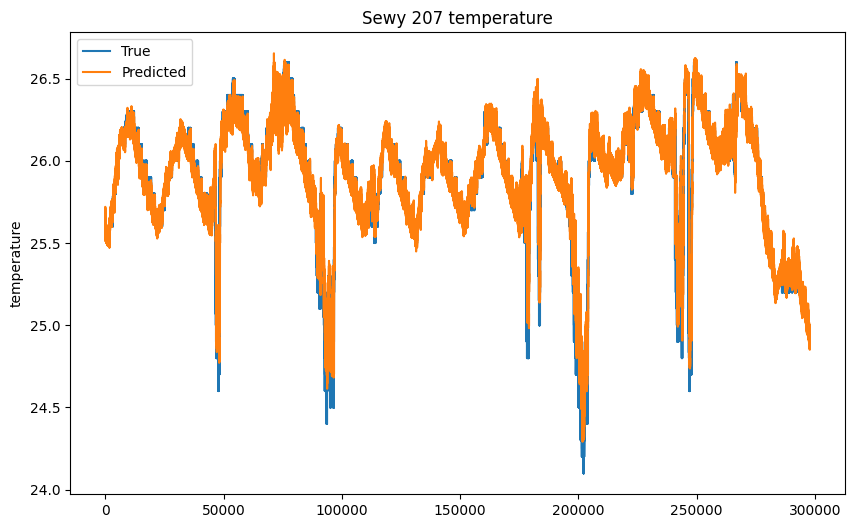

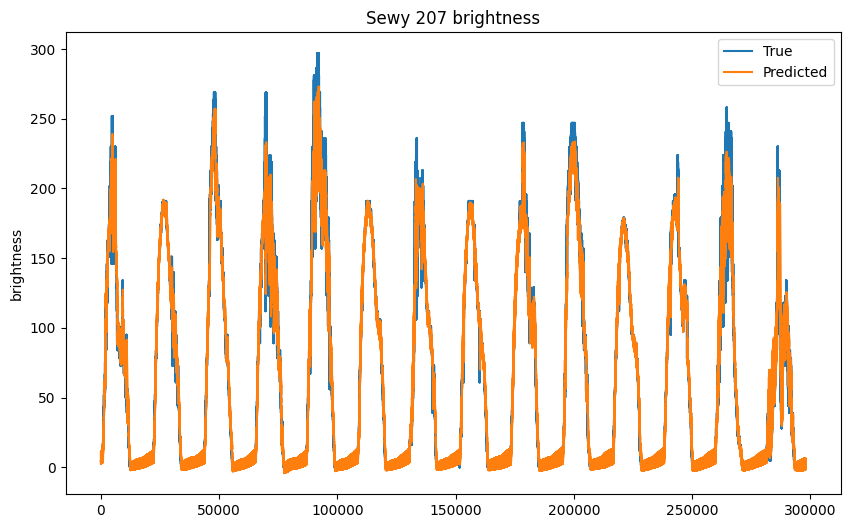

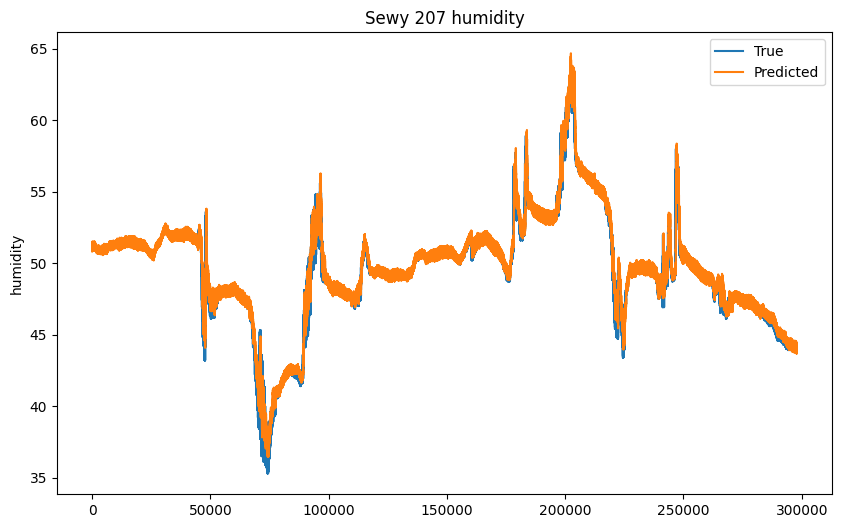

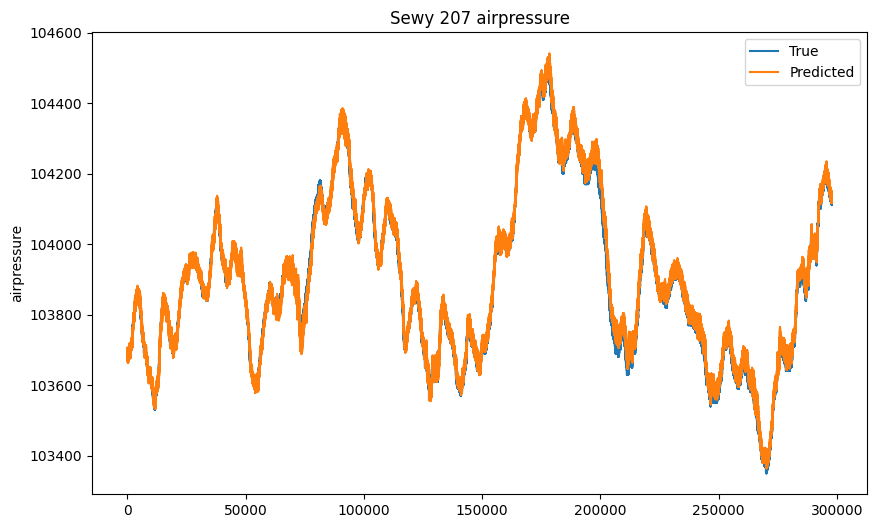

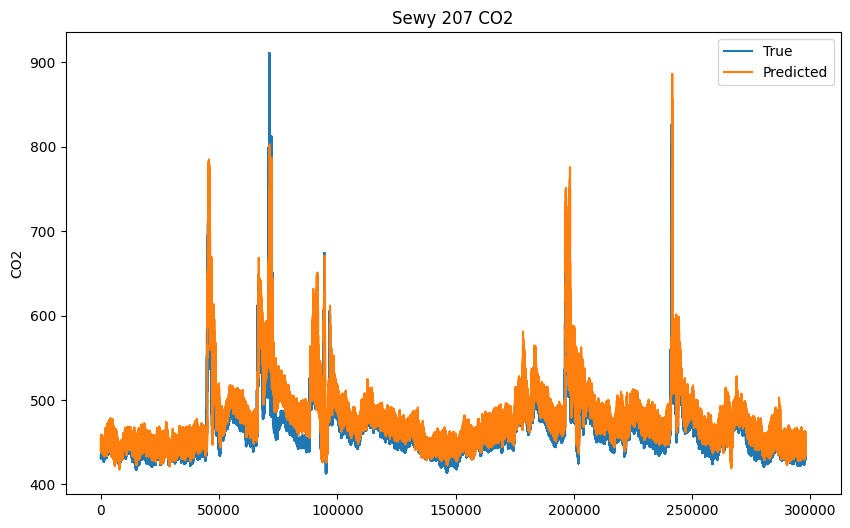

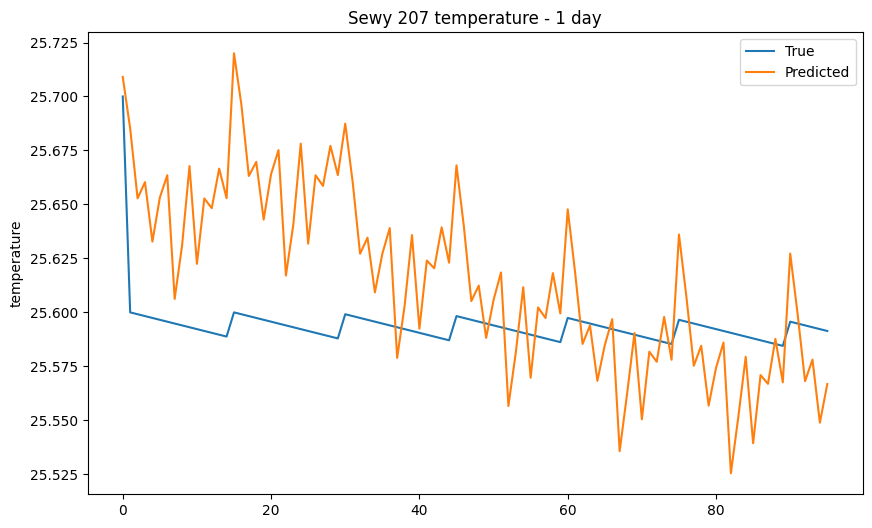

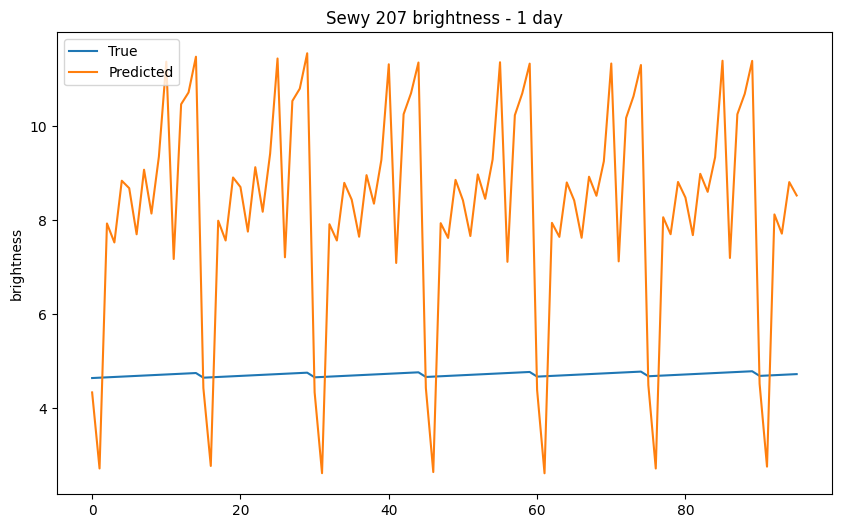

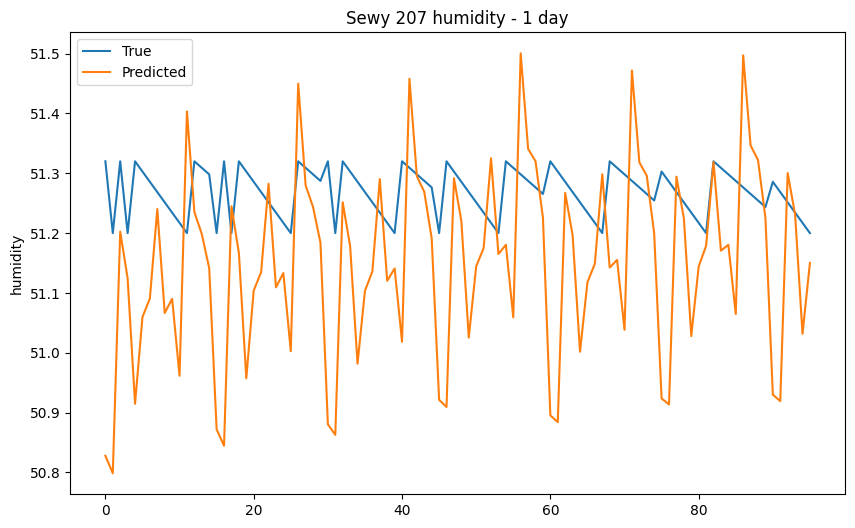

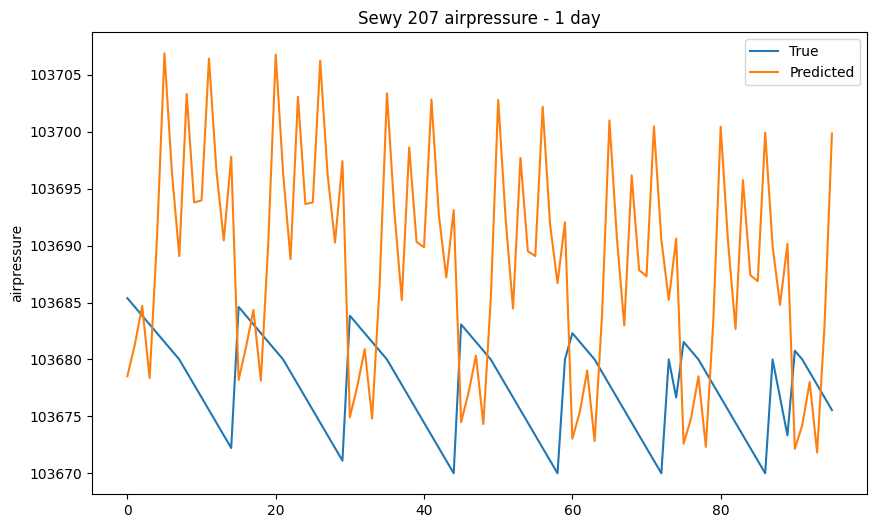

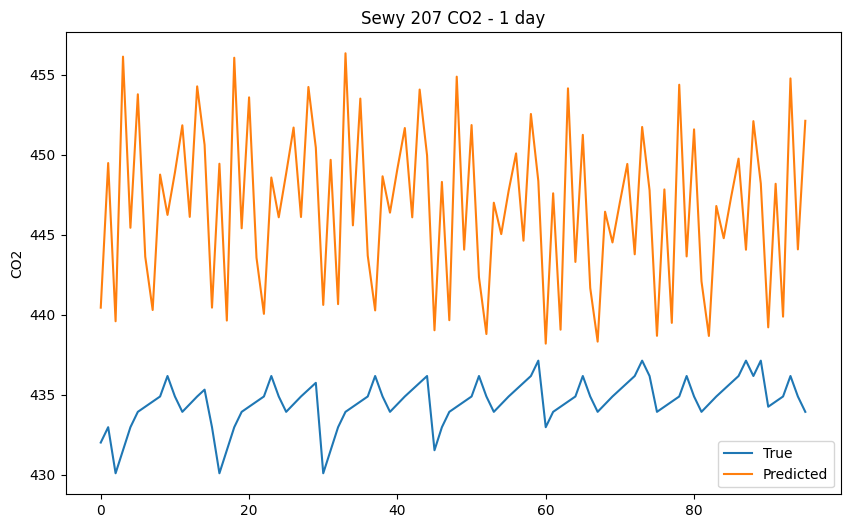

In [42]:
plot_predictions(y_test_temperature, test_predictions_temperature, 'temperature')
plot_predictions(y_test_brightness, test_predictions_brightness, 'brightness')
plot_predictions(y_test_humidity, test_predictions_humidity, 'humidity')
plot_predictions(y_test_airpressure, test_predictions_airpressure, 'airpressure')
plot_predictions(y_test_co2, test_predictions_co2, 'CO2')

plot_predictions_day(y_test_temperature, test_predictions_temperature, 'temperature')
plot_predictions_day(y_test_brightness, test_predictions_brightness, 'brightness')
plot_predictions_day(y_test_humidity, test_predictions_humidity, 'humidity')
plot_predictions_day(y_test_airpressure, test_predictions_airpressure, 'airpressure')
plot_predictions_day(y_test_co2, test_predictions_co2, 'CO2')

In [43]:
# Evaluate the predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_predictions(y_test, test_predictions, name):
    print(name +' - MSE:', mean_squared_error(y_test, test_predictions))
    print(name +' - MAE:', mean_absolute_error(y_test, test_predictions))
    print(name +' - RMSE:', np.sqrt(mean_squared_error(y_test, test_predictions)))
    
evaluate_predictions(y_test_temperature, test_predictions_temperature, 'temperature')
evaluate_predictions(y_test_brightness, test_predictions_brightness, 'brightness')
evaluate_predictions(y_test_humidity, test_predictions_humidity, 'humidity')
evaluate_predictions(y_test_airpressure, test_predictions_airpressure, 'airpressure')
evaluate_predictions(y_test_co2, test_predictions_co2, 'CO2')

temperature - MSE: 0.01079229164429438
temperature - MAE: 0.06632881639493451
temperature - RMSE: 0.10388595499052979
brightness - MSE: 132.76675845375328
brightness - MAE: 6.391361956244548
brightness - RMSE: 11.52244585380002
humidity - MSE: 0.35497649727965225
humidity - MAE: 0.3640693665609061
humidity - RMSE: 0.5957990410194131
airpressure - MSE: 468.09965825792585
airpressure - MAE: 16.939174652186683
airpressure - RMSE: 21.635610882476275
CO2 - MSE: 736.5132742029595
CO2 - MAE: 21.26756894780243
CO2 - RMSE: 27.13877805287039


### Multistep / Predecir valores dentro de 60 minutos

Evaluamos para 60 minutos, 360 minutos y 720 minutos

In [44]:
horizons = [60, 360, 720]

Epoch 1/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 3s 975us/step - loss: 0.0234 - mean_absolute_error: 0.0860 - root_mean_squared_error: 0.1374 - val_loss: 0.0012 - val_mean_absolute_error: 0.0206 - val_root_mean_squared_error: 0.0351
Epoch 2/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - loss: 9.1865e-04 - mean_absolute_error: 0.0145 - root_mean_squared_error: 0.0303 - val_loss: 0.0012 - val_mean_absolute_error: 0.0209 - val_root_mean_squared_error: 0.0353
Epoch 3/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - loss: 8.8369e-04 - mean_absolute_error: 0.0140 - root_mean_squared_error: 0.0297 - val_loss: 0.0012 - val_mean_absolute_error: 0.0188 - val_root_mean_squared_error: 0.0342
Epoch 4/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - loss: 8.5076e-04 - mean_absolute_error: 0.0134 - root_mean_squared_error: 0.0292 - val_loss: 0.0012 - val_mean_absolute_error: 0.0199 - val_root_mean_squared_error: 0.0349
Epoch 5/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - loss: 8.1832e-04 - mean_ab

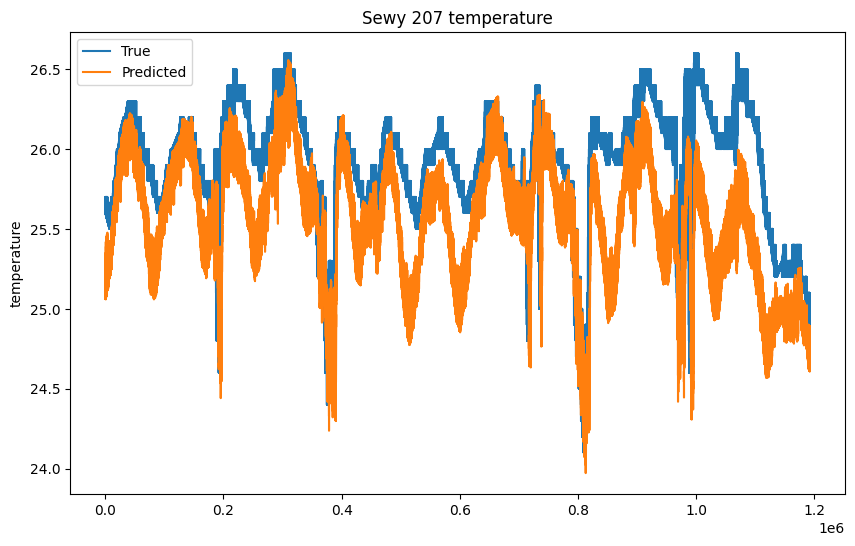

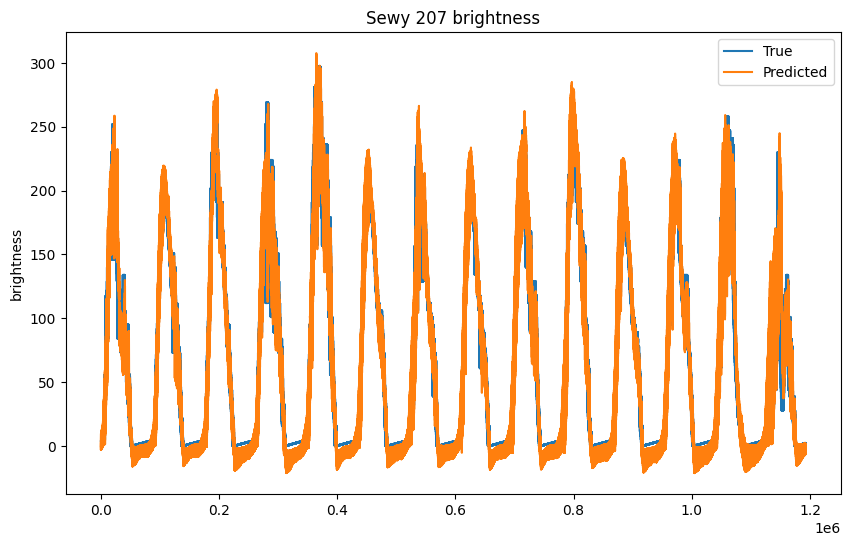

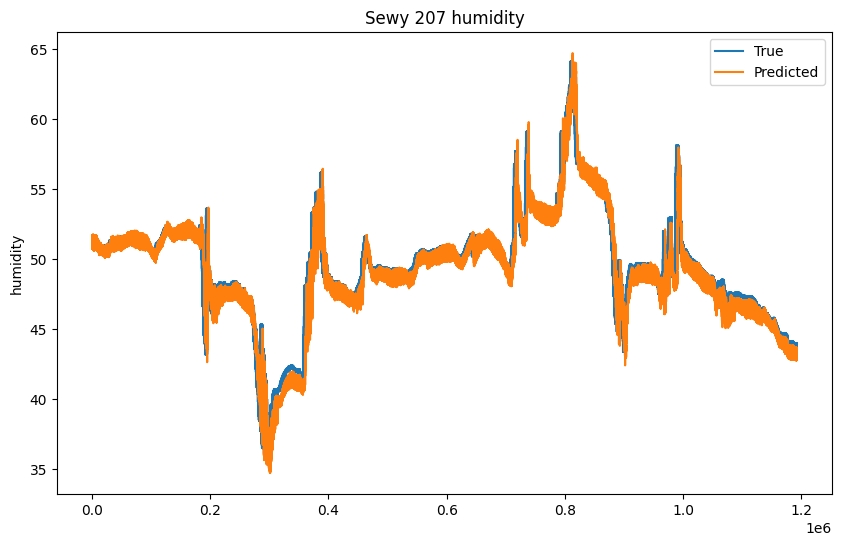

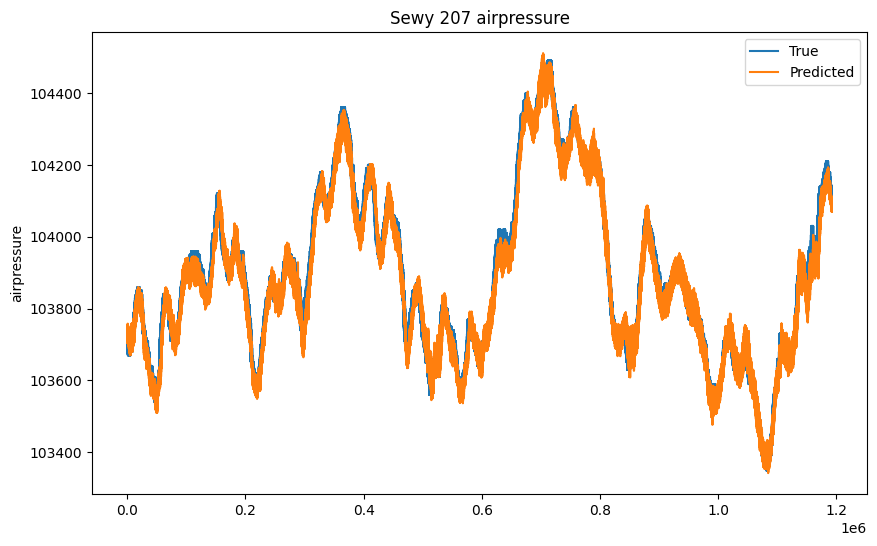

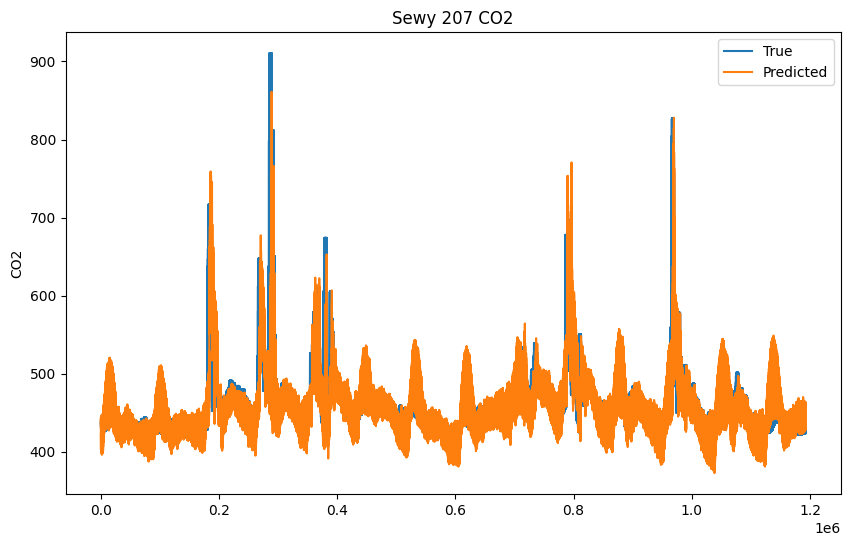

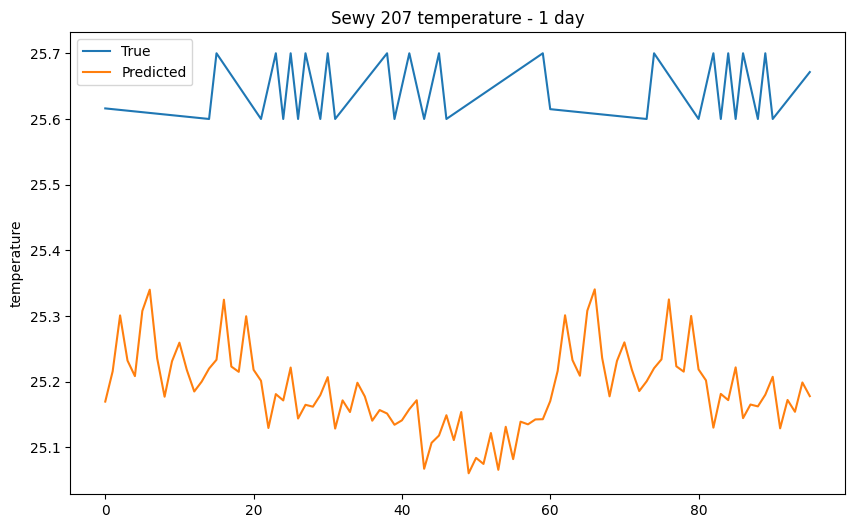

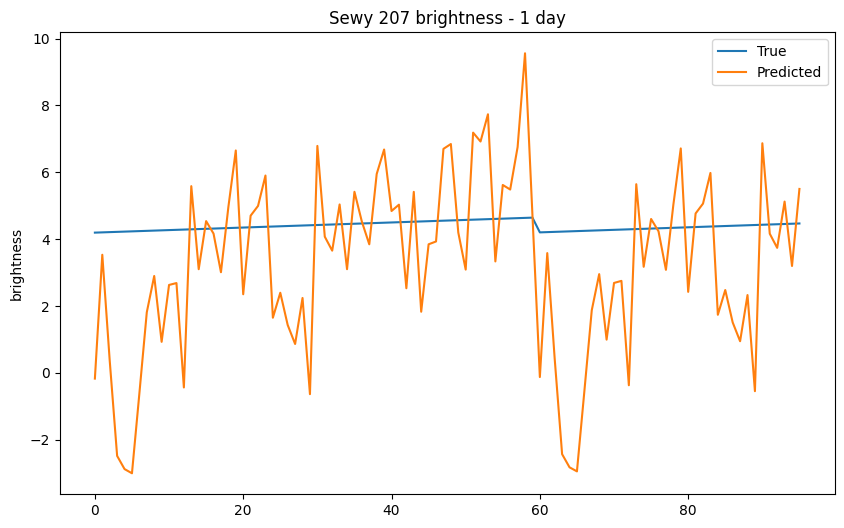

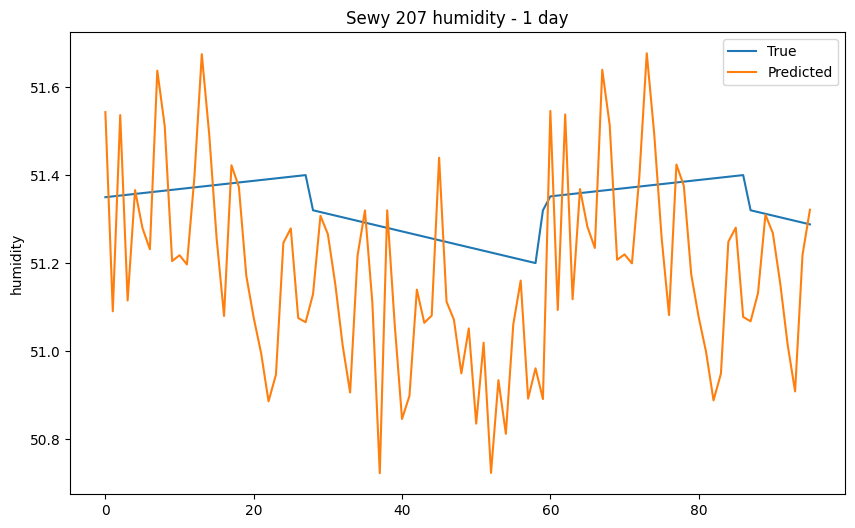

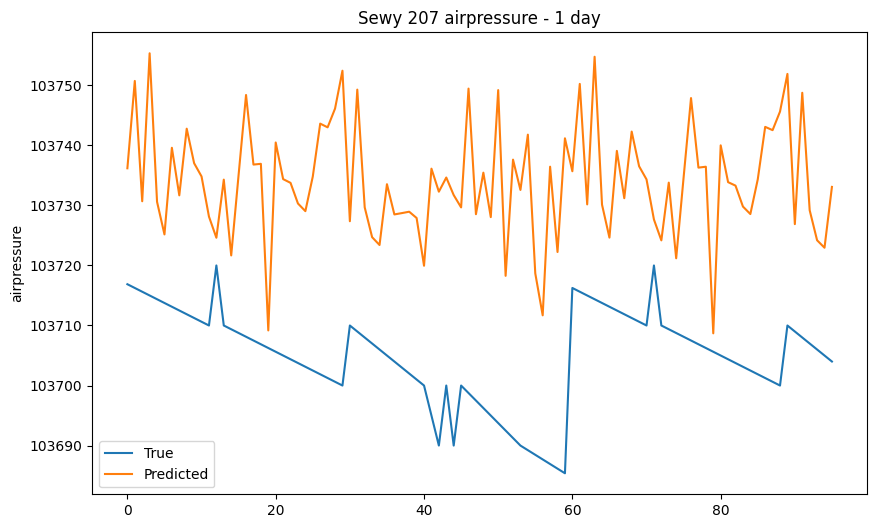

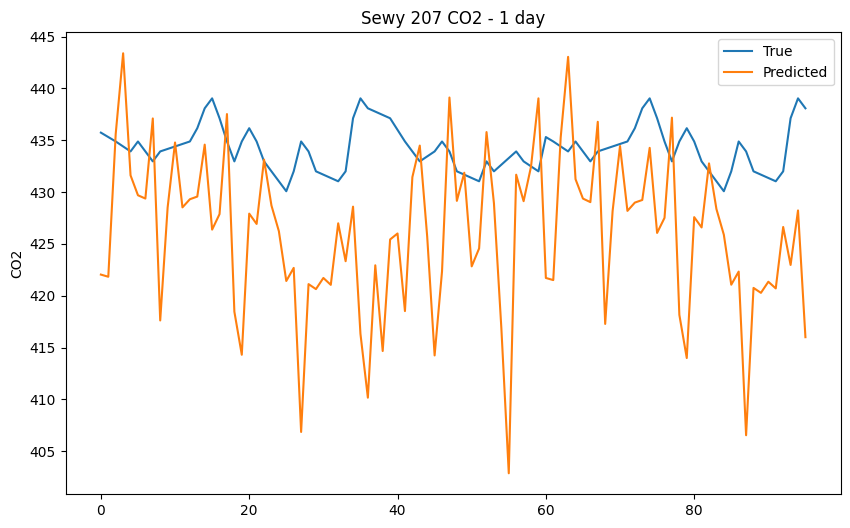

temperature - MSE: 0.21292063213488033
temperature - MAE: 0.38415987812366725
temperature - RMSE: 0.46143323692044586
brightness - MSE: 340.143402765991
brightness - MAE: 12.178971737847274
brightness - RMSE: 18.44297705811052
humidity - MSE: 1.014694529270503
humidity - MAE: 0.6349880097915783
humidity - RMSE: 1.0073204699947793
airpressure - MSE: 1032.854698758988
airpressure - MAE: 25.593499187099745
airpressure - RMSE: 32.13805686034842
CO2 - MSE: 859.7489589125294
CO2 - MAE: 18.200616257466567
CO2 - RMSE: 29.321476069811517
Epoch 1/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0254 - mean_absolute_error: 0.0965 - root_mean_squared_error: 0.1463 - val_loss: 0.0038 - val_mean_absolute_error: 0.0409 - val_root_mean_squared_error: 0.0616
Epoch 2/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0031 - mean_absolute_error: 0.0318 - root_mean_squared_error: 0.0557 - val_loss: 0.0037 - val_mean_absolute_error: 0.0398 - val_root_mean_squared_error: 0.0604
Epoch 3/20
1986/1

c:\Users\IvO\Desktop\testGit\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


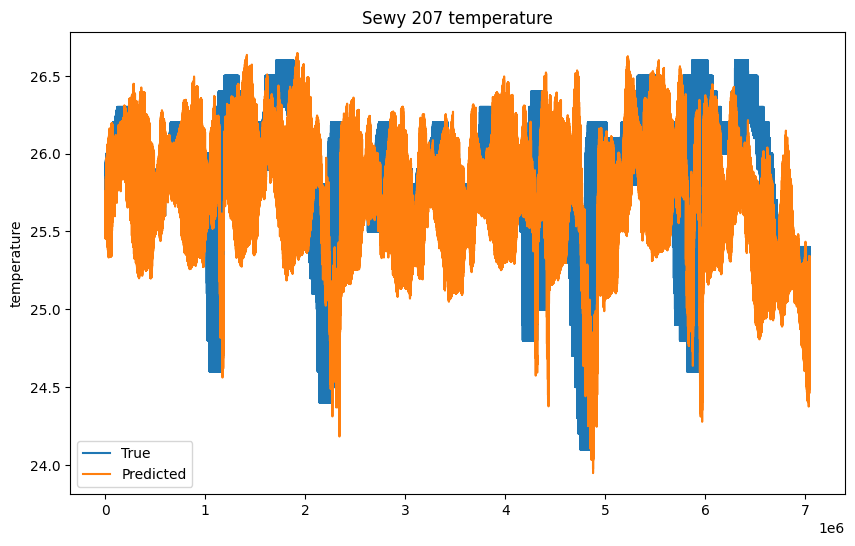

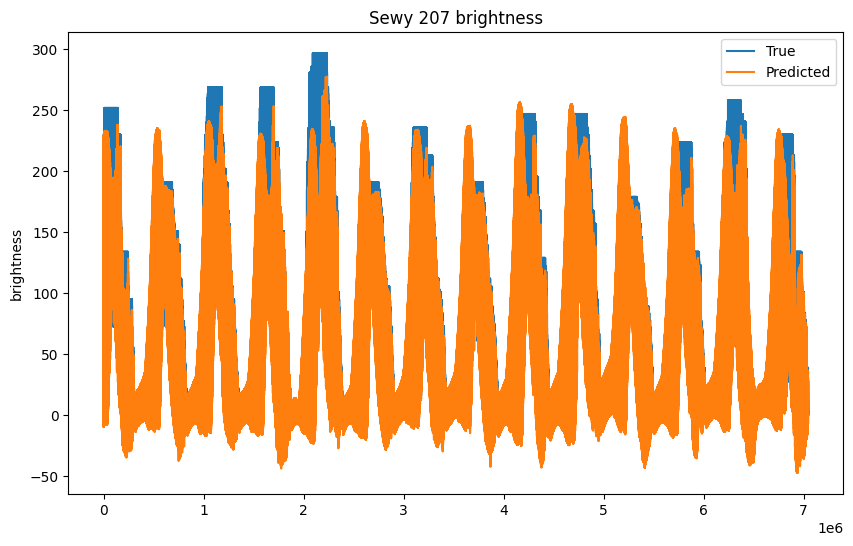

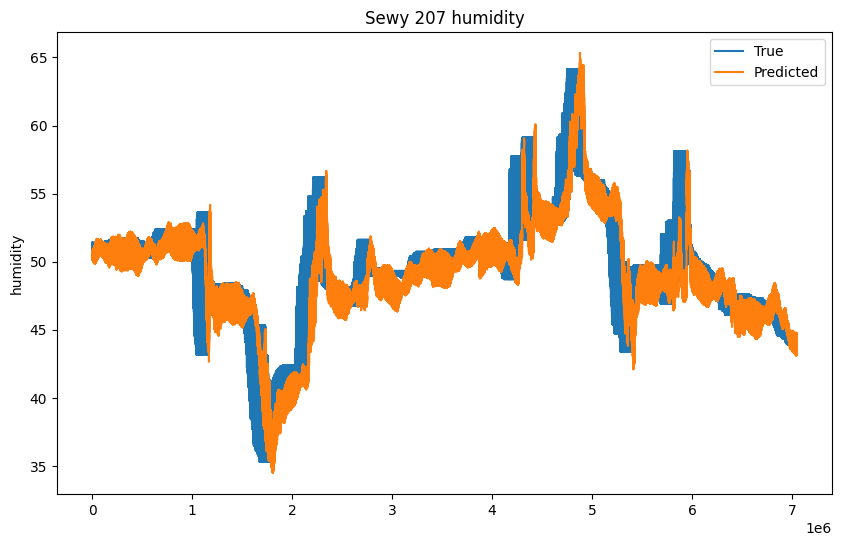

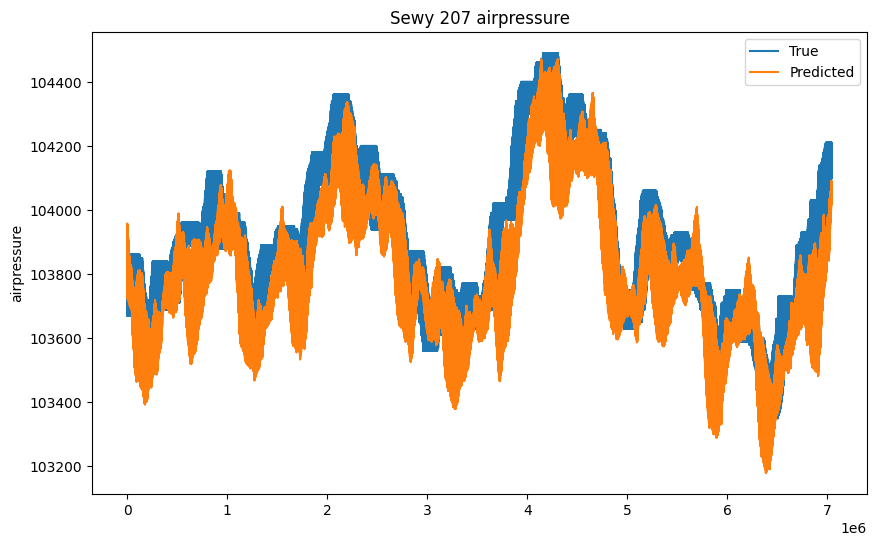

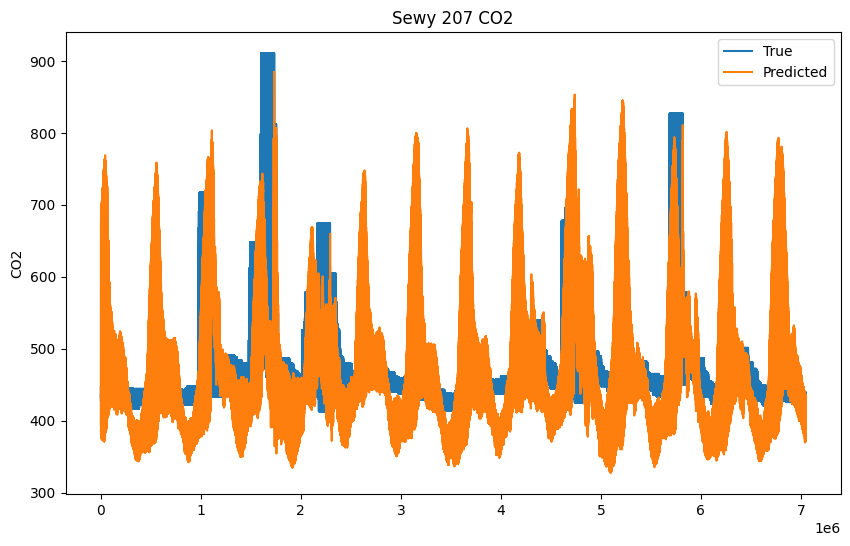

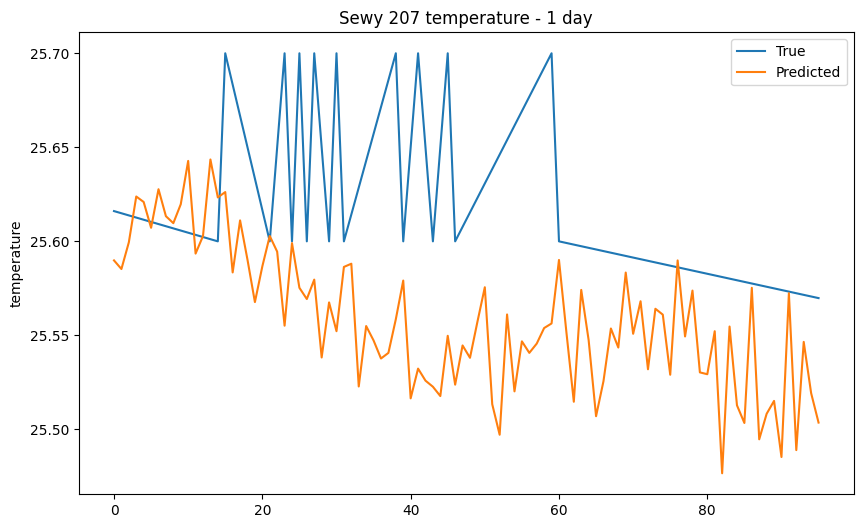

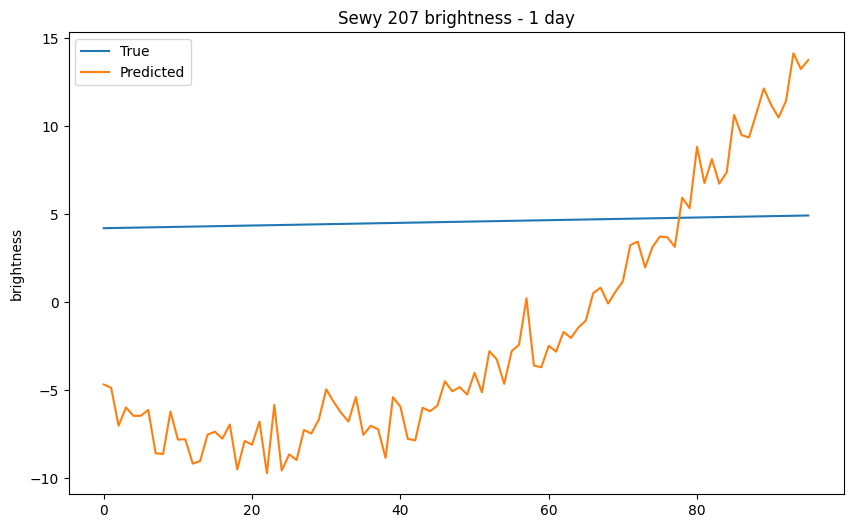

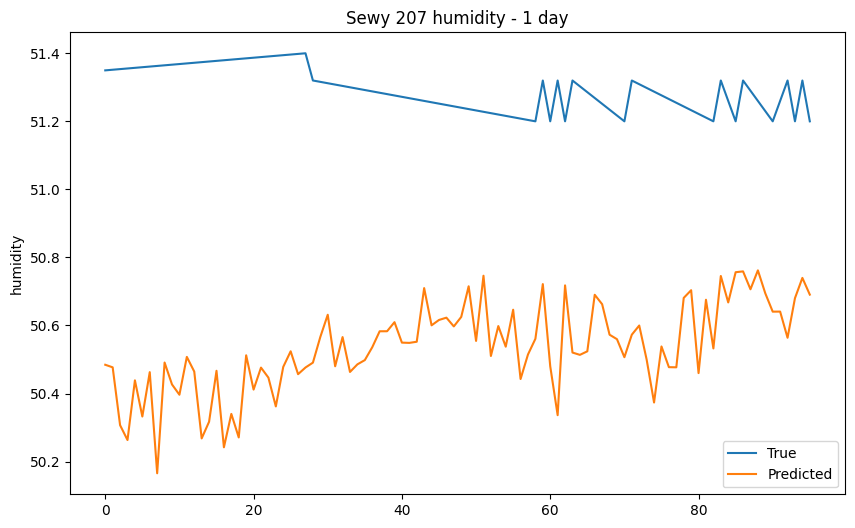

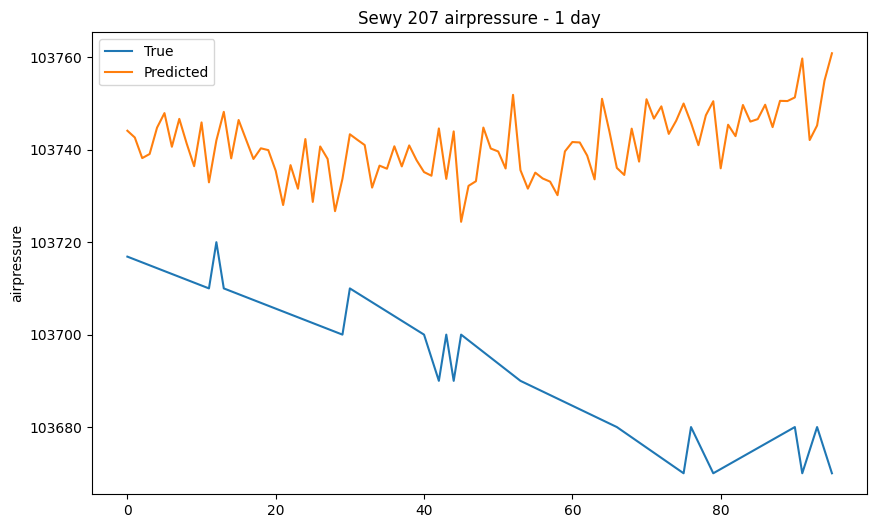

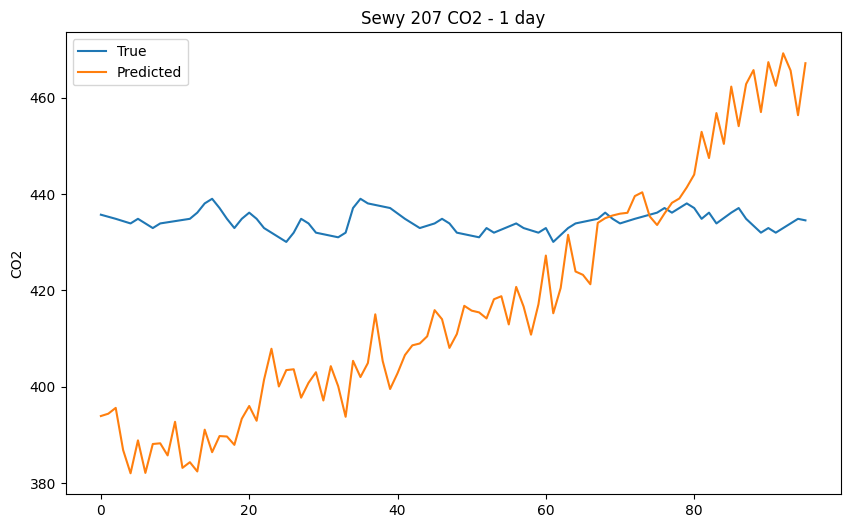

temperature - MSE: 0.2203716549753588
temperature - MAE: 0.34508818999569807
temperature - RMSE: 0.46943759433534804
brightness - MSE: 1102.061752510208
brightness - MAE: 23.263024178130657
brightness - RMSE: 33.19731544131555
humidity - MSE: 4.208795258341187
humidity - MAE: 1.328083527197252
humidity - RMSE: 2.051534854283784
airpressure - MSE: 18991.417630480093
airpressure - MAE: 110.89423955202052
airpressure - RMSE: 137.8093524782701
CO2 - MSE: 8059.837101522153
CO2 - MAE: 63.85551367668097
CO2 - RMSE: 89.77659551086883
Epoch 1/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0267 - mean_absolute_error: 0.1023 - root_mean_squared_error: 0.1513 - val_loss: 0.0053 - val_mean_absolute_error: 0.0499 - val_root_mean_squared_error: 0.0727
Epoch 2/20
1986/1986 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0045 - mean_absolute_error: 0.0421 - root_mean_squared_error: 0.0674 - val_loss: 0.0047 - val_mean_absolute_error: 0.0465 - val_root_mean_squared_error: 0.0683
Epoch 3/20
1986/1986

c:\Users\IvO\Desktop\testGit\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


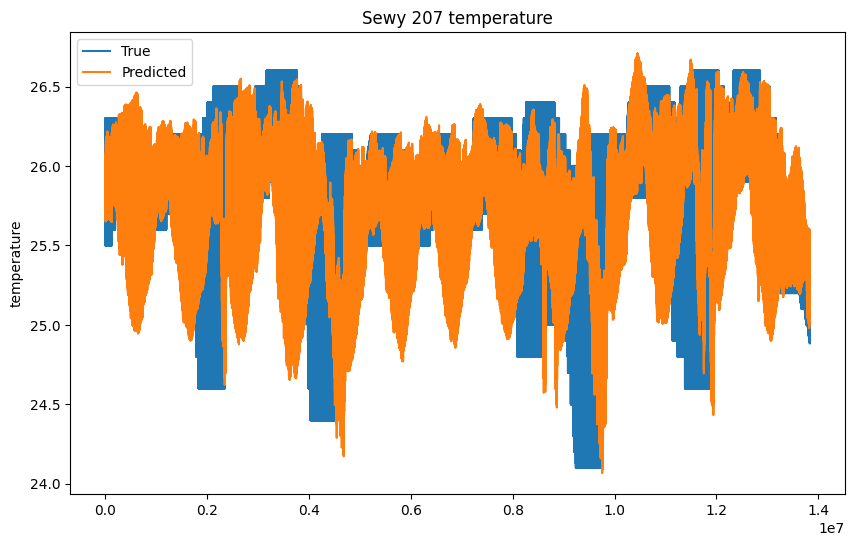

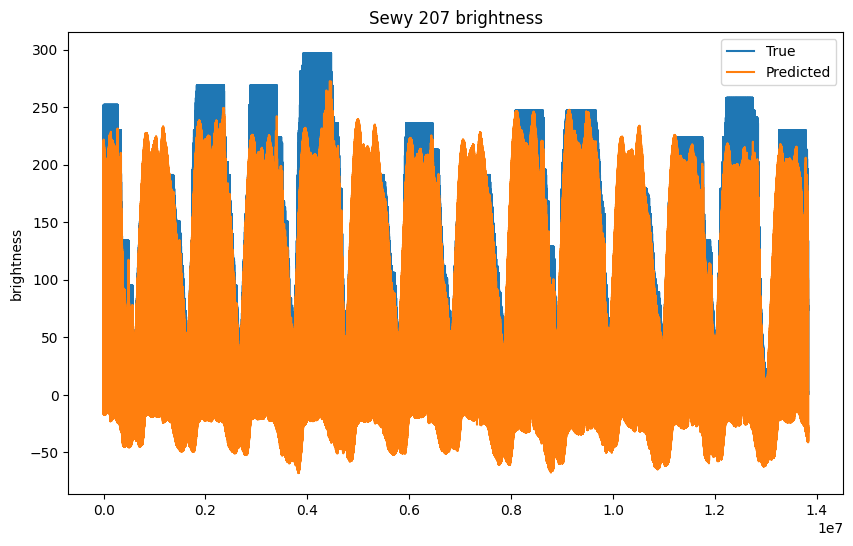

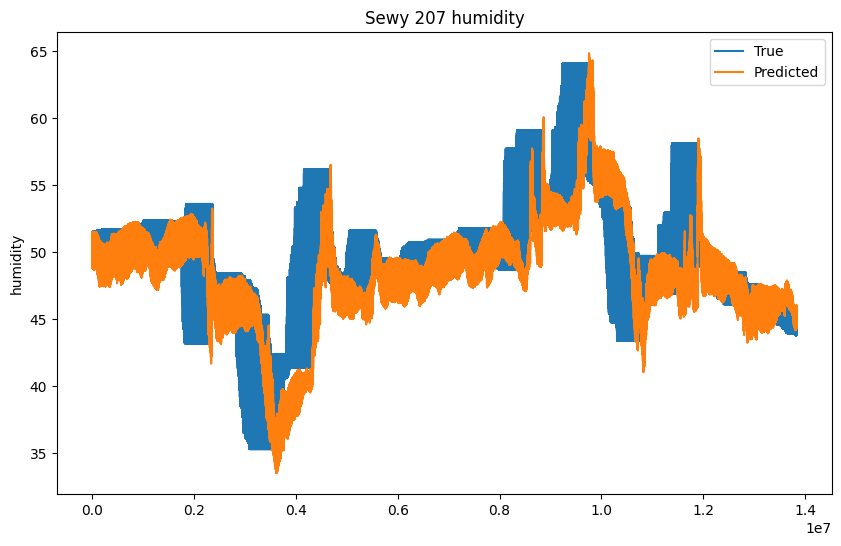

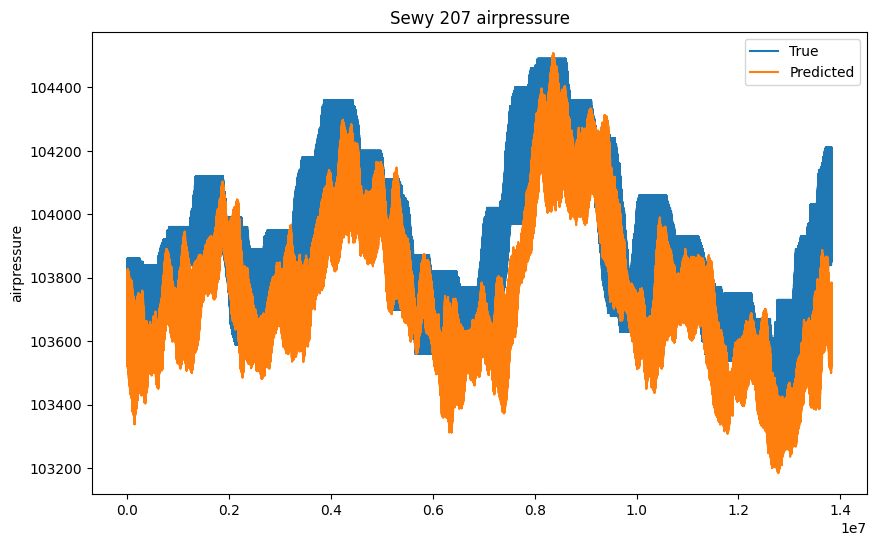

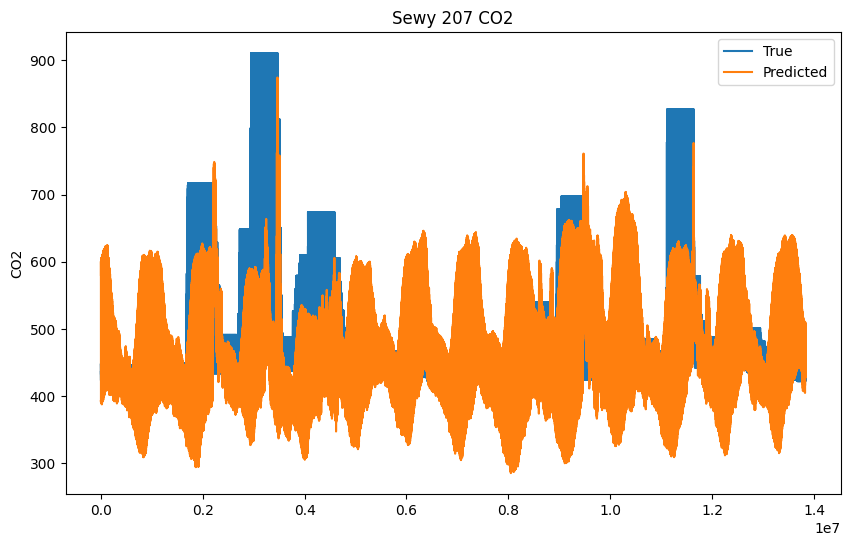

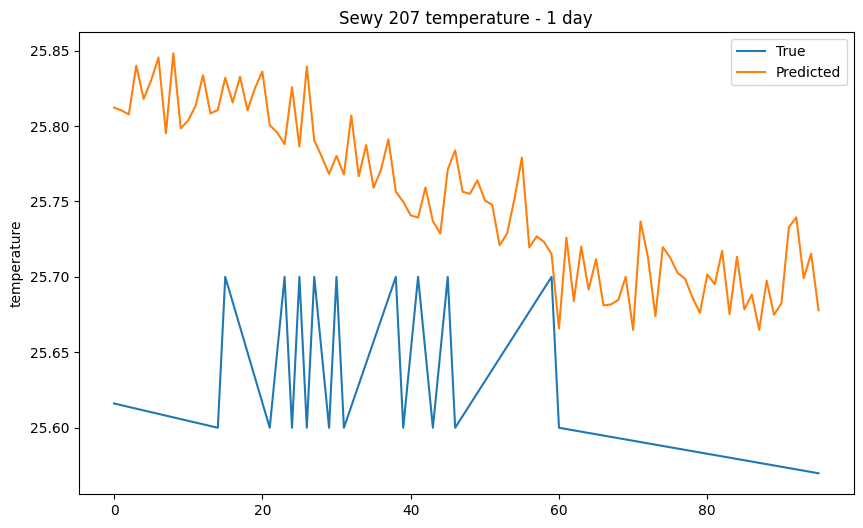

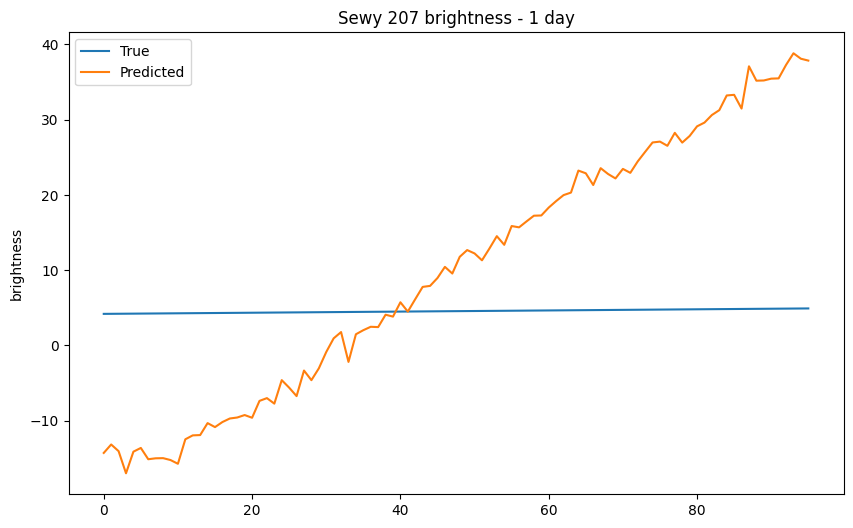

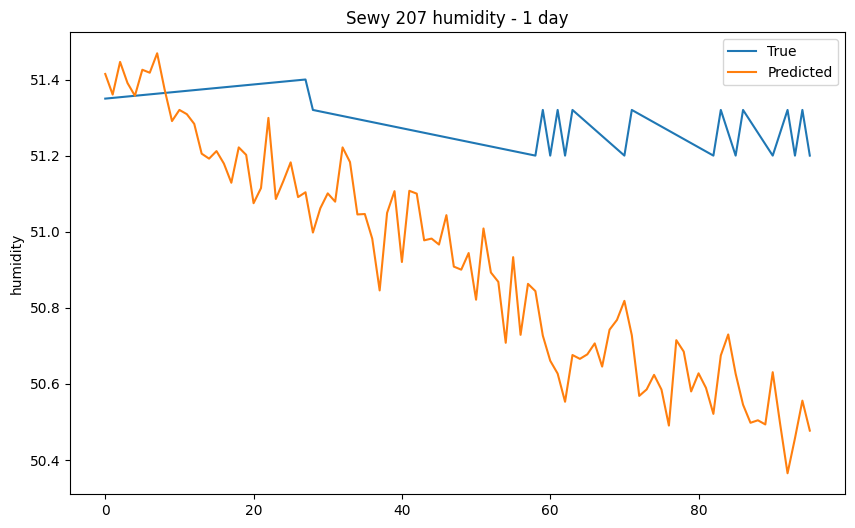

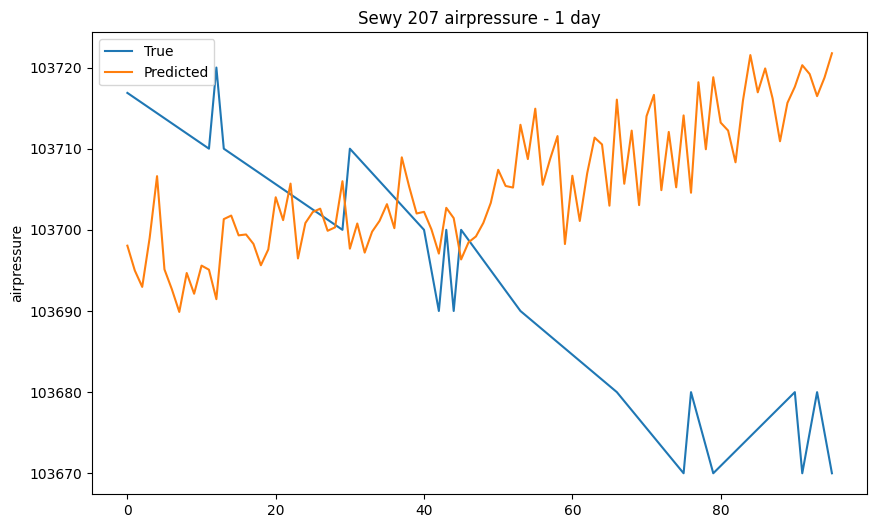

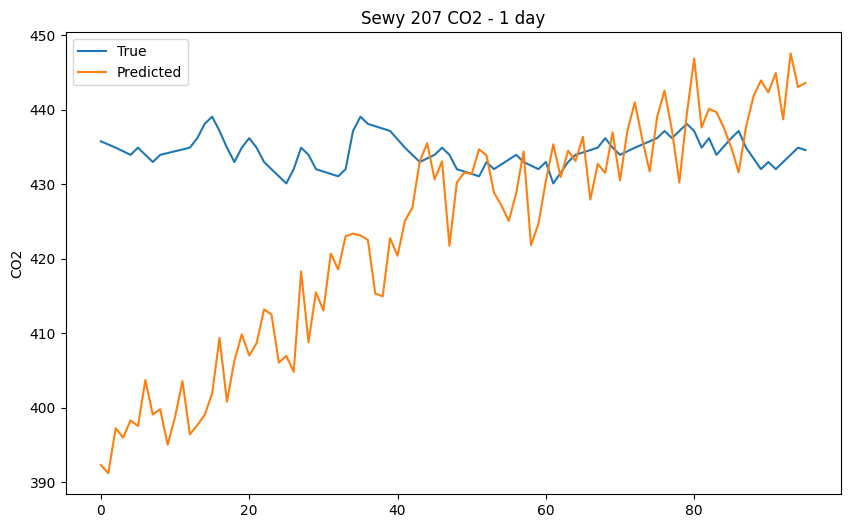

temperature - MSE: 0.2352267252441406
temperature - MAE: 0.37570850170627207
temperature - RMSE: 0.48500177859894555
brightness - MSE: 1269.0850212172456
brightness - MAE: 29.30048514600519
brightness - RMSE: 35.62421958748354
humidity - MSE: 9.241724650000117
humidity - MAE: 2.122397825958407
humidity - RMSE: 3.0400205015756256
airpressure - MSE: 38164.50108473617
airpressure - MAE: 156.02974968744826
airpressure - RMSE: 195.3573676233793
CO2 - MSE: 5459.831517471962
CO2 - MAE: 57.21287698573936
CO2 - RMSE: 73.89067273663139


In [45]:
for horizon in horizons:
    X, y = split_sequence(completed_df, 1, horizon)
    X_train, X_test = X[:lsmt_separation_rows], X[lsmt_separation_rows:]
    y_train, y_test = y[:lsmt_separation_rows], y[lsmt_separation_rows:]

    HandMadeLSTM = Sequential()
    HandMadeLSTM.add(InputLayer((1, len(completed_df.columns))))
    HandMadeLSTM.add(LSTM(64, activation='relu'))
    HandMadeLSTM.add(Dense(horizon*(len(completed_df.columns)-4)))

    modelPath = f'../LSMTTensorflow/bestModel_sewy_207_{horizon}.keras'
    checkpoints = ModelCheckpoint(modelPath, save_best_only=True)
    HandMadeLSTM.compile(optimizer=Adam(learning_rate=0.001), loss=mse_tf(), metrics=[mae_tf(), RootMeanSquaredError()])

    HandMadeLSTM.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[checkpoints])

    HandMadeLSTM = load_model(modelPath)

    test_predictions_temperature, test_predictions_brightness, test_predictions_humidity, test_predictions_airpressure, test_predictions_co2, y_test_temperature, y_test_brightness, y_test_humidity, y_test_airpressure, y_test_co2 = inverse_transform_dataset(HandMadeLSTM.predict(X_test), y_test)
    
    plot_predictions(y_test_temperature, test_predictions_temperature, 'temperature')
    plot_predictions(y_test_brightness, test_predictions_brightness, 'brightness')
    plot_predictions(y_test_humidity, test_predictions_humidity, 'humidity')
    plot_predictions(y_test_airpressure, test_predictions_airpressure, 'airpressure')
    plot_predictions(y_test_co2, test_predictions_co2, 'CO2')

    plot_predictions_day(y_test_temperature, test_predictions_temperature, 'temperature')
    plot_predictions_day(y_test_brightness, test_predictions_brightness, 'brightness')
    plot_predictions_day(y_test_humidity, test_predictions_humidity, 'humidity')
    plot_predictions_day(y_test_airpressure, test_predictions_airpressure, 'airpressure')
    plot_predictions_day(y_test_co2, test_predictions_co2, 'CO2')
    
    evaluate_predictions(y_test_temperature, test_predictions_temperature, 'temperature')
    evaluate_predictions(y_test_brightness, test_predictions_brightness, 'brightness')
    evaluate_predictions(y_test_humidity, test_predictions_humidity, 'humidity')
    evaluate_predictions(y_test_airpressure, test_predictions_airpressure, 'airpressure')
    evaluate_predictions(y_test_co2, test_predictions_co2, 'CO2')
    
    

In [46]:
# Guardamos los datos necesarios para transformar los datos de normalización a los datos originales
dump(scaler_temperature, open('scalers/sewy/scaler_temperature_sewy_207.pkl', 'wb'))
dump(scaler_brightness, open('scalers/sewy/scaler_brightness_sewy_207.pkl', 'wb'))
dump(scaler_humidity, open('scalers/sewy/scaler_humidity_sewy_207.pkl', 'wb'))
dump(scaler_airpressure, open('scalers/sewy/scaler_airpressure_sewy_207.pkl', 'wb'))
dump(scaler_co2, open('scalers/sewy/scaler_co2_sewy_207.pkl', 'wb'))


In [47]:
scaler_temperature.data_max_, scaler_brightness.data_max_, scaler_humidity.data_max_, scaler_airpressure.data_max_, scaler_co2.data_max_, scaler_temperature.data_min_, scaler_brightness.data_min_, scaler_humidity.data_min_, scaler_airpressure.data_min_, scaler_co2.data_min_

(array([26.6]),
 array([386.88]),
 array([64.12]),
 array([104830.]),
 array([1690.88]),
 array([17.9]),
 array([0.]),
 array([31.6]),
 array([102930.]),
 array([392.96]))